<h1 align="center">Recoup Thwarted Belongingness</h1>

### Libraries

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
pd.options.display.max_columns = 30
pd.options.display.max_rows = 30
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
import warnings
warnings.filterwarnings("ignore")
import os
from scipy import stats
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud

In [3]:
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_Interactivity = 'all'

# Pre-Processing

In [1]:
#Loading the dataset
suicide_filepath = "Suicides in India 2001-2012.csv"
suicide_data = pd.read_csv(suicide_filepath, parse_dates=True)
print(suicide_data.shape)

NameError: name 'pd' is not defined

In [6]:
#First 5 values
suicide_data.head(5)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [7]:
#Last 5 values
suicide_data.tail(5)

,State,Year,Type_code,Type,Gender,Age_group,Total
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189
237518,West Bengal,2012,Social_Status,Never Married,Male,0-100+,2658


In [8]:
#Displays number of rows and columns as well as the column names
print("(Rows, Columns): " + str(suicide_data.shape))
suicide_data.columns

(Rows, Columns): (237519, 7)


Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [9]:
#Helps to identify the unique values
suicide_data['Age_group'].unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

In [10]:
#For the convinience of later codes the '0' of age group '0-14' is replaced by '1'
suicide_data['Age_group'] = suicide_data['Age_group'].replace(['0-14'],'1-14')
suicide_data['Age_group'].unique()

array(['1-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

In [11]:
#nunique() helps to identify the count of unique values
suicide_data['Age_group'].nunique()

6

In [12]:
suicide_data['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [13]:
suicide_data['Type_code'].nunique()

5

In [14]:
suicide_data['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [15]:
suicide_data['State'].nunique()

38

In [16]:
suicide_data['Type'].unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis', 'Diploma',
       'No Education', 'Post Graduate and Above', 'Middle', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary', 'By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)'

In [17]:
suicide_data['Type'].nunique()

69

In [18]:
#To check if any missing data is present
suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [19]:
#To prove the above result of missing data
suicide_data.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [20]:
#Describing the column total for proving the cleaning process later
suicide_data['Total'].describe()

count    237519.000000
mean         55.034477
std         792.749038
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max       63343.000000
Name: Total, dtype: float64

In [21]:
#Describing the column state for proving the cleaning process later
suicide_data['State'].describe()

count             237519
unique                38
top       Madhya Pradesh
freq                6792
Name: State, dtype: object

In [22]:
#Gives the total count of entries for each states
suicide_data['State'].value_counts()

Madhya Pradesh       6792
Maharashtra          6792
Karnataka            6792
Rajasthan            6791
Andhra Pradesh       6791
Odisha               6791
Haryana              6790
Bihar                6790
Chhattisgarh         6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (States)        312
Total (All India)     312
Total (Uts)           312
Name: State,

In [23]:
#Arranging states and their respective total count in descending order
by_states= suicide_data.groupby('State').count()['Total'].reset_index().sort_values(by= 'Total',ascending=False)
by_states.style.background_gradient(cmap='Blues')

,State,Total
19,Madhya Pradesh,6792
20,Maharashtra,6792
16,Karnataka,6792
25,Odisha,6791
1,Andhra Pradesh,6791
28,Rajasthan,6791
4,Bihar,6790
6,Chhattisgarh,6790
12,Haryana,6790
17,Kerala,6788


In [24]:
#Preprocessing the data further by droping the unnecessary entries that aren't required for our studies
suicide_data.replace('Delhi (Ut)', 'Delhi', inplace=True)
suicide_data.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
suicide_data.replace('By Other means (please specify)', 'By Other means', inplace=True)
suicide_data.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency', inplace=True)
suicide_data = suicide_data.drop(suicide_data[(suicide_data.State == 'Total (Uts)') | 
                                              (suicide_data.State == 'Total (All India)') | 
                                              (suicide_data.State == 'Total (States)')].index)
suicide_data=suicide_data.drop(suicide_data[(suicide_data.Type =='By Other means')|
                                            (suicide_data.Type=='Other Causes (Please Specity)')|
                                            (suicide_data.Type=='Others (Please Specify)')|
                                            (suicide_data.Type=='Causes Not known')].index)
suicide_data = suicide_data.drop(suicide_data[suicide_data['Total'] == 0].index)

In [25]:
#Checking for duplicate data
duplicate = suicide_data.duplicated()
print(duplicate.sum())

0


Repeating the process of defining the details to prove the difference after preprocessing the data and removing the unnecessary details

In [26]:
by_states= suicide_data.groupby('State').count()['Total'].reset_index().sort_values(by= 'Total',ascending=False)
by_states.style.background_gradient(cmap='Blues')

,State,Total
1,Andhra Pradesh,4586
16,Karnataka,4515
30,Tamil Nadu,4477
20,Maharashtra,4435
19,Madhya Pradesh,4429
32,Uttar Pradesh,4364
11,Gujarat,4267
34,West Bengal,4049
17,Kerala,3939
6,Chhattisgarh,3771


In [27]:
suicide_data['Total'].describe()

count    86576.000000
mean        71.398240
std        287.200654
min          1.000000
25%          2.000000
50%          8.000000
75%         32.000000
max       8756.000000
Name: Total, dtype: float64

In [28]:
suicide_data['State'].describe()

count              86576
unique                35
top       Andhra Pradesh
freq                4586
Name: State, dtype: object

In [29]:
suicide_data['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [30]:
suicide_data['State'].nunique()

35

In [31]:
suicide_data['Type'].unique()

array(['Love Affairs', 'Other Prolonged Illness',
       'Failure in Examination', 'Family Problems',
       'Insanity/Mental Illness', 'Death of Dear Person', 'No Education',
       'Middle', 'Primary', 'Matriculate/Secondary', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'By Hanging',
       'By Fire/Self Immolation', 'By Consuming Other Poison',
       'By Drowning', 'Student', 'House Wife', 'Service (Private)',
       'Public Sector Undertaking', 'Service (Government)',
       'Farming/Agriculture Activity', 'Retired Person', 'Married',
       'Never Married', 'Unemployment', 'Post Graduate and Above',
       'Self-employed (Business activity)', 'Fall in Social Reputation',
       'Suspected/Illicit Relation',
       'Cancellation/Non-Settlement of Marriage',
       'Not having Children (Barrenness/Impotency', 'Poverty',
       'By Consuming Insecticides', 'Unemployed',
       'Professional/Career Problem', 'Paralysis',
       'Bankruptcy or Sudden change in Econo

In [32]:
suicide_data['Type'].nunique()

62

# Data Summarization and Visualization

## Statistical Analysis

In [128]:
from sklearn.preprocessing import LabelEncoder
#encoding the categorical features with LabelEncoder
stat_data = suicide_data.copy()
categorical = ['State', 'Year','Type_code','Type', 'Gender', 'Age_group']
le = LabelEncoder()
for column in categorical:
    stat_data[column] = le.fit_transform(stat_data[column])
stat_data.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total,AgeN
13,0,0,0,35,0,1,1.0,1
32,0,0,0,42,1,1,1.0,1
47,0,0,0,24,1,1,1.0,1
54,0,0,0,42,0,2,8.0,15
69,0,0,0,26,0,2,5.0,15
72,0,0,0,24,0,2,2.0,15
77,0,0,0,34,0,2,2.0,15
81,0,0,0,42,1,2,3.0,15
88,0,0,0,26,1,2,3.0,15
89,0,0,0,35,1,2,3.0,15


#### Year wise rate analysis

In [34]:
yearwise= suicide_data[['Year', 'Total']].groupby('Year').sum()
yearwise.reset_index(inplace = True)
round((yearwise['Total'].max() - yearwise['Total'].min())/yearwise['Total'].min()*100, 2)

20.61

From Year 2001 to 2011 suicides rate is increased by 20.61% 

#### Analyzing Gender wise suicide proportions across 'Age Groups'

In [35]:
gender_age = suicide_data[suicide_data['Age_group'] != '0-100+']

gender_suicide_propositions = gender_age.pivot_table(index=['Year', 'Gender'],
                                                     values='Total',
                                                     columns='Age_group',
                                                     aggfunc='sum',
                                                     margins=True)
for index, series in gender_suicide_propositions.iterrows():
    gender_suicide_propositions.loc[index,['15-29', '30-44', '45-59', '60+','1-14']] = gender_suicide_propositions.loc[
             index, ['15-29', '30-44', '45-59', '60+','1-14'
                     ]] / gender_suicide_propositions.loc[index,
                                                          ['All']]['All']

display(gender_suicide_propositions)

Age_group        1-14     15-29     30-44     45-59       60+      All
Year Gender                                                           
2001 Female  0.027935  0.466255  0.308934  0.139428  0.057448   100769
     Male    0.018762  0.308298  0.356171  0.231360  0.085410   150147
2002 Female  0.028982  0.463740  0.308687  0.141558  0.057033    99959
     Male    0.014697  0.308051  0.358216  0.230536  0.088499   155945
2003 Female  0.025252  0.454684  0.307818  0.151197  0.061049   101378
     Male    0.014839  0.312801  0.356206  0.228602  0.087552   159242
2004 Female  0.027370  0.466212  0.306415  0.142288  0.057716    99088
     Male    0.015672  0.305854  0.359388  0.232193  0.086893   159841
2005 Female  0.024851  0.459365  0.301144  0.150432  0.064209    99753
     Male    0.014956  0.304055  0.357450  0.236057  0.087483   158534
2006 Female  0.024531  0.470126  0.303932  0.146151  0.055260   106027
     Male    0.012745  0.301939  0.372187  0.228464  0.084665   170425
2007 Female  0.024598  0.470283  0.307290  0.142304  0.055526   104888
     Male    0.012506  0.295942  0.366936  0.239657  0.084959   172071
2008 Female  0.022084  0.466879  0.317947  0.137820  0.055270   107002
     Male    0.011247  0.303560  0.371627  0.233953  0.079613   174180
2009 Female  0.023070  0.459053  0.311338  0.146649  0.059890   107931
     Male    0.013304  0.298628  0.365262  0.238054  0.084751   177237
2010 Female  0.025185  0.468050  0.302897  0.140990  0.062878   111533
     Male    0.015064  0.310414  0.353893  0.234811  0.085819   183352
2011 Female  0.022461  0.470827  0.310316  0.139574  0.056821   111525
     Male    0.012852  0.310500  0.359685  0.233739  0.083223   181681
2012 Female  0.023566  0.464376  0.303681  0.146999  0.061378   101926
     Male    0.011760  0.301620  0.354322  0.241515  0.090782   175078
All          0.018155  0.366330  0.340571  0.199556  0.075387  3269512

In [36]:
fig = px.sunburst(gender_age,
                  title = 'Gender wise suicides proportions across Age Groups',
                  path=['Gender', 'Age_group'],
                  values='Total')
fig.show()

The gender wise suicide proportions across age groups for all years are calculated in the Suicides Proportion Table. Based on the table and the sunburst chart we can say that:

People from age 15-45 represent the bulk of suicides.

The number of Suicides tend to fall after 45 years for both the genders.

Suicides of People in the age group of 1-14 years and above 60 who tend to be non-working/dependent population is very small compared with 15-45 Age group

#### Correlations

In [37]:
stat_data.corr()

,State,Year,Type_code,Type,Gender,Age_group,Total
State,1.000000,-0.010077,-0.002170,-0.005665,-0.007839,0.020296,0.031229
Year,-0.010077,1.000000,0.006109,-0.001163,0.000315,0.007121,0.012262
Type_code,-0.002170,0.006109,1.000000,0.054175,0.017015,-0.096886,0.119817
Type,-0.005665,-0.001163,0.054175,1.000000,0.020060,-0.106988,0.028086
Gender,-0.007839,0.000315,0.017015,0.020060,1.000000,0.069614,0.041704
Age_group,0.020296,0.007121,-0.096886,-0.106988,0.069614,1.000000,-0.197362
Total,0.031229,0.012262,0.119817,0.028086,0.041704,-0.197362,1.000000


In [38]:
Year_column = suicide_data.loc[:,'Year']
Year = Year_column.values
Year

array([2001, 2001, 2001, ..., 2012, 2012, 2012], dtype=int64)

In [39]:
Total_column = suicide_data.loc[:,'Total']
Total = Total_column.values
Total

array([   1,    1,    1, ..., 5451,  189, 2658], dtype=int64)

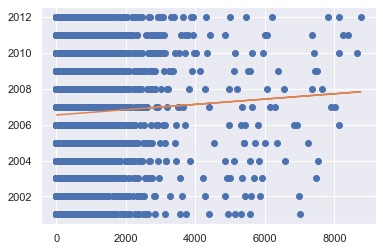

In [40]:
plt. plot(Total, Year, 'o')
m, b = np. polyfit(Total, Year, 1)
x = plt. plot(Total, m*Total + b)

#### Hypothesis Testing

##### To find out the dependence of suicide rate on the age
Finding out whether there is a dependence of total on the age using the Chi- Square test. The hypothesis statements for this test are:

H0: Total and age are independent (Null).
H1: Total and age are dependent (Alternate)

In [41]:
#Creating Contingency Table
contingency_table = pd.crosstab(stat_data.Total, stat_data.Age_group)

#Significance Level 5%
alpha=0.05

In [42]:
chistat, p, dof, expected = stats.chi2_contingency(contingency_table )

In [43]:
#critical_value
critical_value=stats.chi2.ppf(q=1-alpha,df=dof)
print('critical_value:',critical_value)

critical_value: 8958.600385815764


In [44]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)
print('chi-square statistic:',chistat)
print('critical_value:',critical_value)
print('p-value:',p) 

Significance level:  0.05
Degree of Freedom:  8740
chi-square statistic: 19233.96035895886
critical_value: 8958.600385815764
p-value: 0.0


Here, pvalue = 0.0 and a low pvalue suggests that your sample provides enough evidence that you can reject  H0  for the entire population.


Now compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)

In [45]:
if chistat>=critical_value:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")

Reject H0,There is a dependency between Age group & Suicide rate.


In [46]:
if p<=alpha:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")

Reject H0,There is a dependency between Age group & Suicide rate.


##### Test Conclusion: 
By performing Chi- Square test, the result obtained is to reject the null hypothesis. This basically means that there is dependency between Age group & Total number of suicides.

### Suicide trend over the years from 2001 to 2012 based on State

In [47]:
#Grouping the data after calculating the sum of total for respective states and viewing the first 10
suicide_data.groupby("State")["Total"].sum().sort_values(ascending = False)[:10]

State
Maharashtra       855611
West Bengal       709969
Andhra Pradesh    703486
Tamil Nadu        696957
Karnataka         594641
Kerala            472724
Madhya Pradesh    391781
Gujarat           296395
Chhattisgarh      236825
Odisha            206601
Name: Total, dtype: int64

In [48]:
#Summing up the total, grouping and viewing the last 10
suicide_data.groupby("State")["Total"].sum().sort_values(ascending = True)[:10]

State
Lakshadweep            45
Daman & Diu          1074
Nagaland             1310
Manipur              1651
D & N Haveli         3137
Mizoram              3143
Meghalaya            4348
Chandigarh           4613
Arunachal Pradesh    5244
A & N Islands        7238
Name: Total, dtype: int64

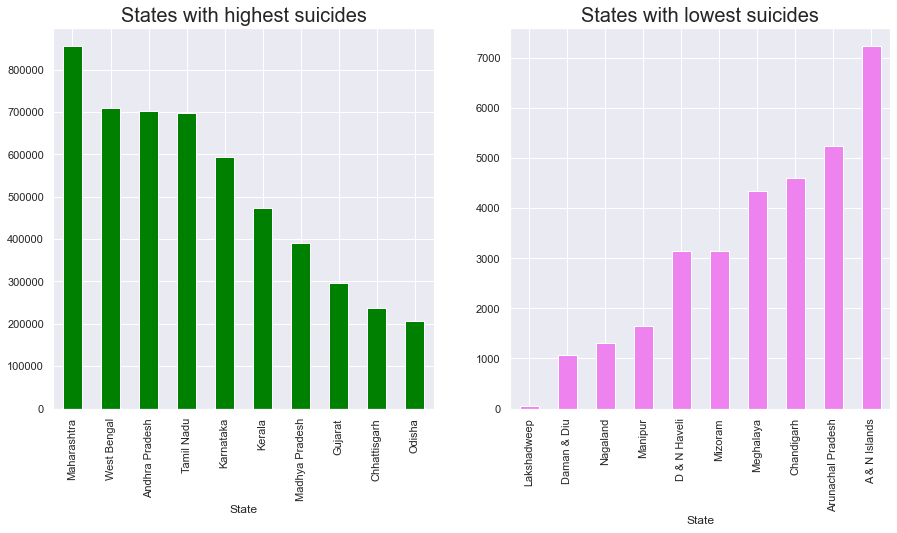

In [49]:
f, ax = plt.subplots(1,2, figsize = (15,7))
suicide_data.groupby("State")["Total"].sum().sort_values(ascending = False)[:10].plot(kind = "bar", color = "green", ax= ax[0])
suicide_data.groupby("State")["Total"].sum().sort_values(ascending = True)[:10].plot(kind = "bar", color = "violet", ax= ax[1])
ax[0].set_title('States with highest suicides', fontsize = 20)
x = ax[1].set_title('States with lowest suicides', fontsize = 20)

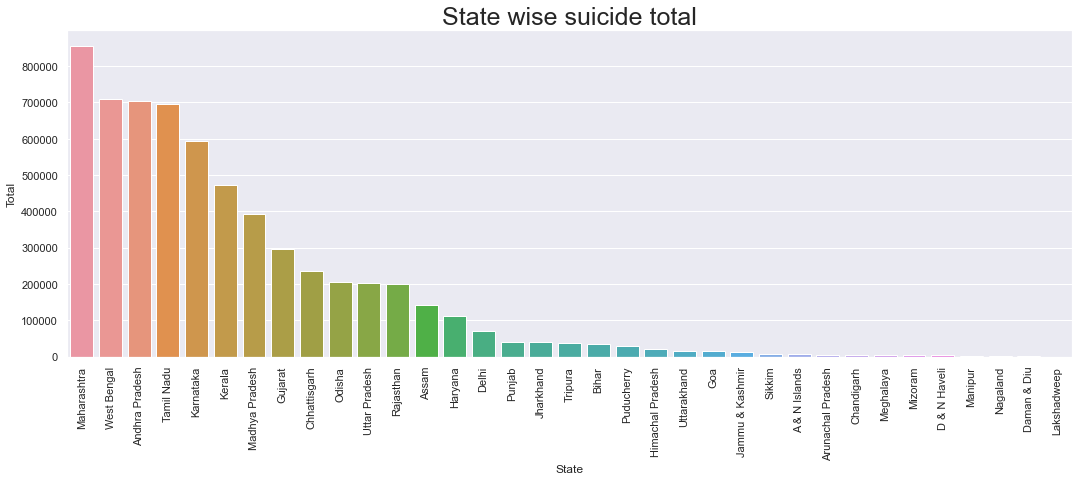

In [50]:
grp = suicide_data.groupby('State')['Total'].sum()
total_suicides = pd.DataFrame(grp).reset_index().sort_values('Total',ascending=False)

fig , ax = plt.subplots(figsize=(18,6))
g = sns.barplot(x = 'State', y = 'Total',data = total_suicides,ax=ax)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
x = g.set_title('State wise suicide total', fontsize = 25)

#### Cause-wise analysis of each state 

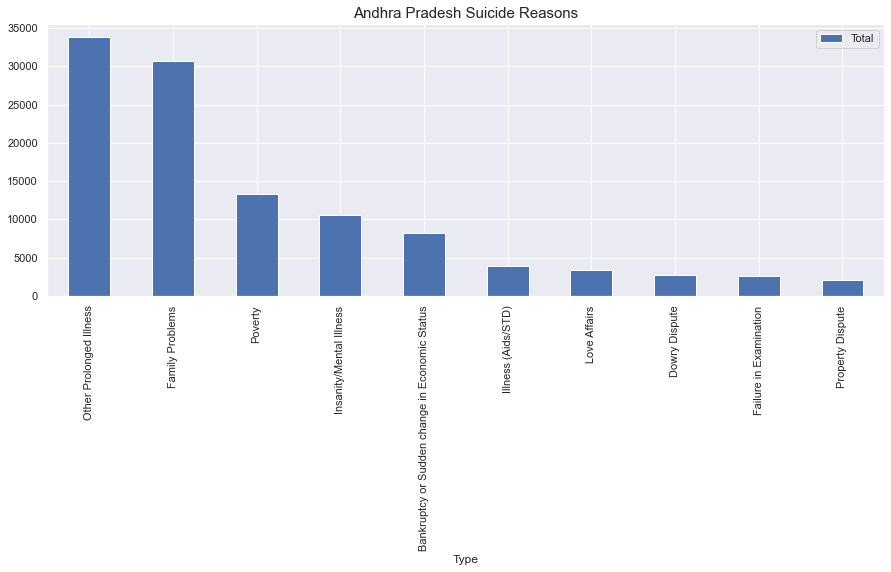

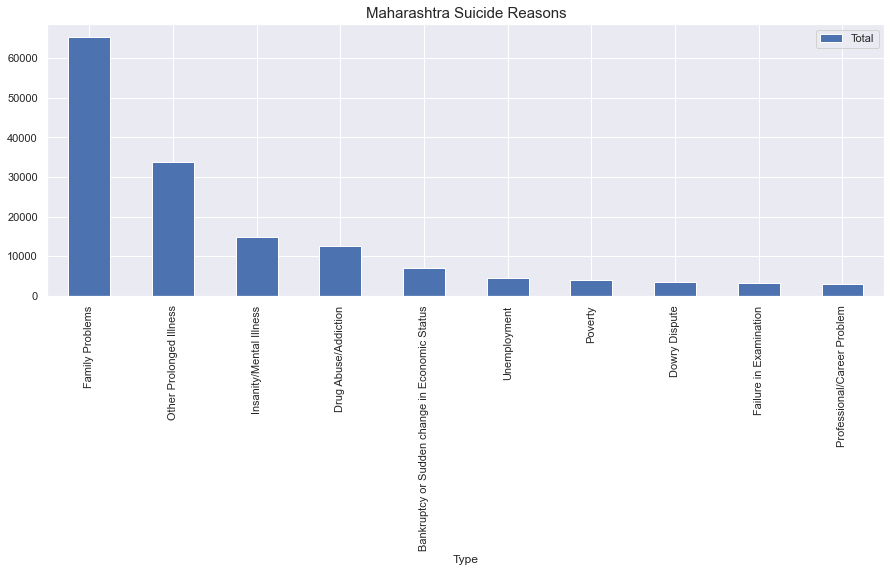

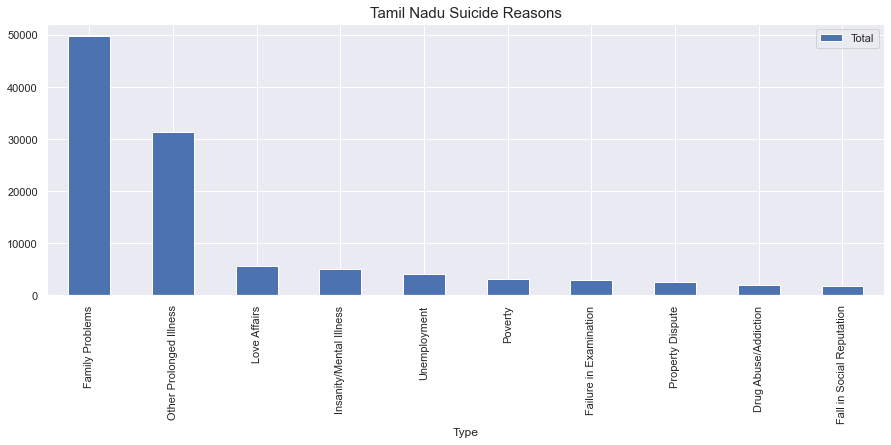

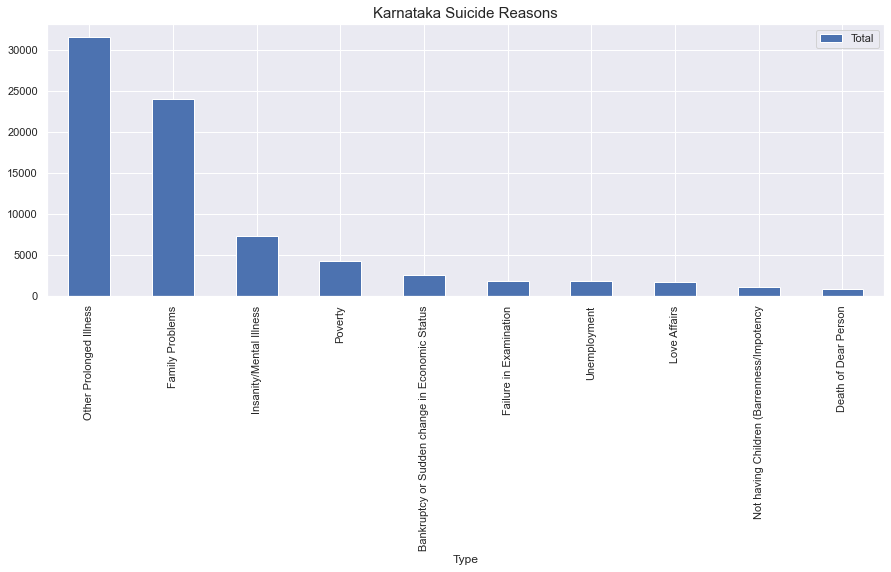

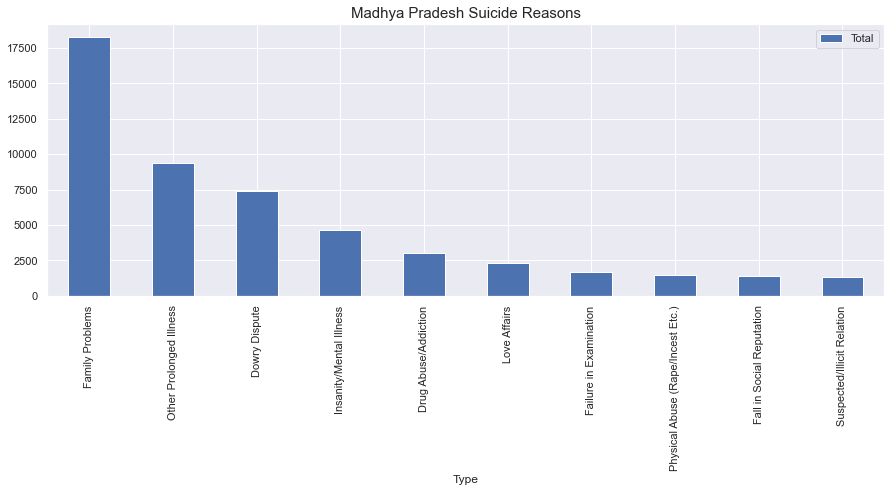

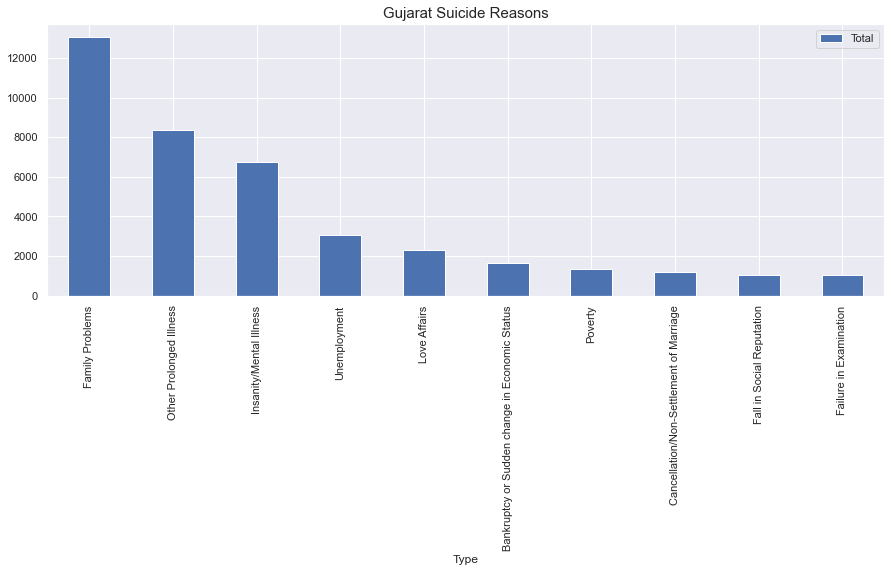

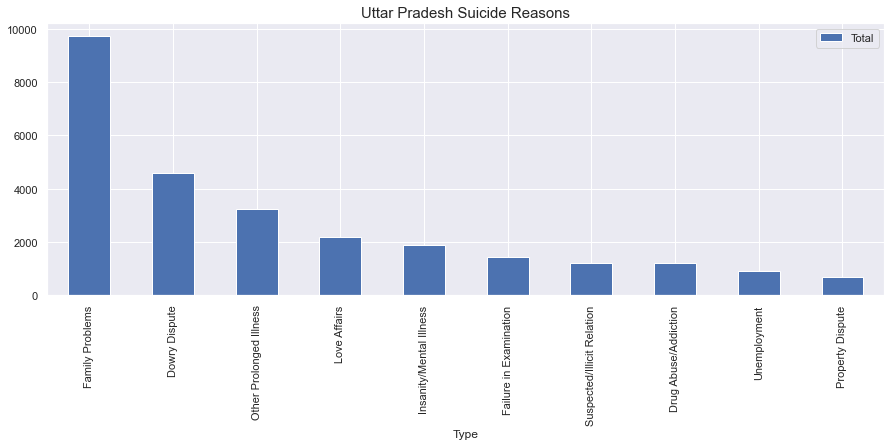

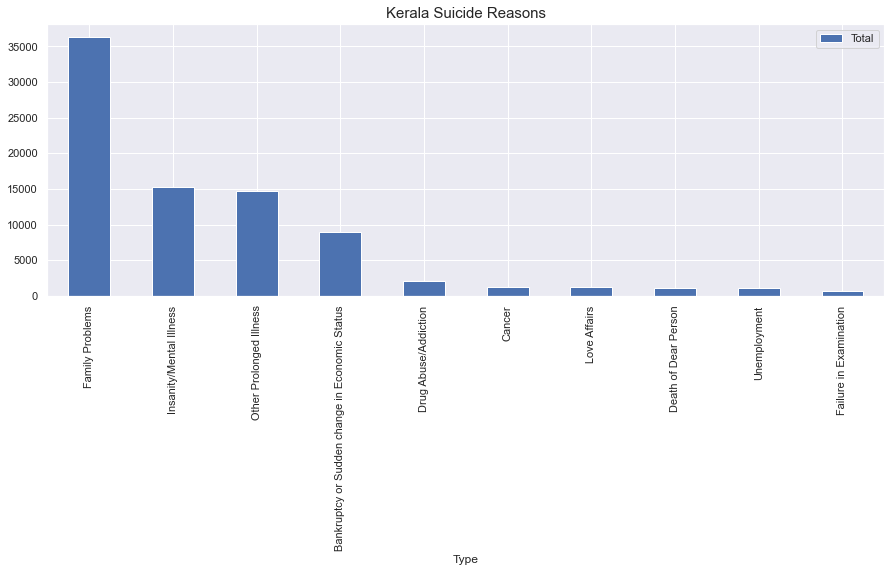

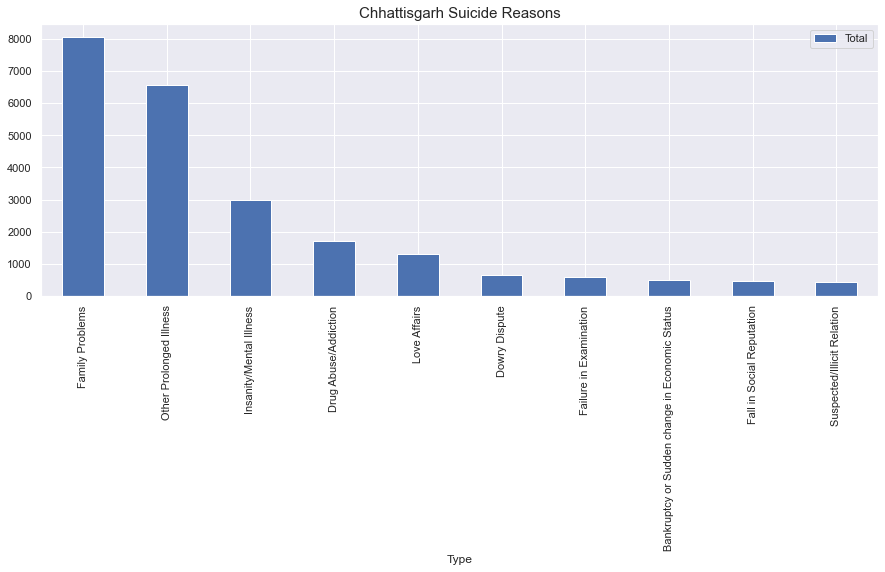

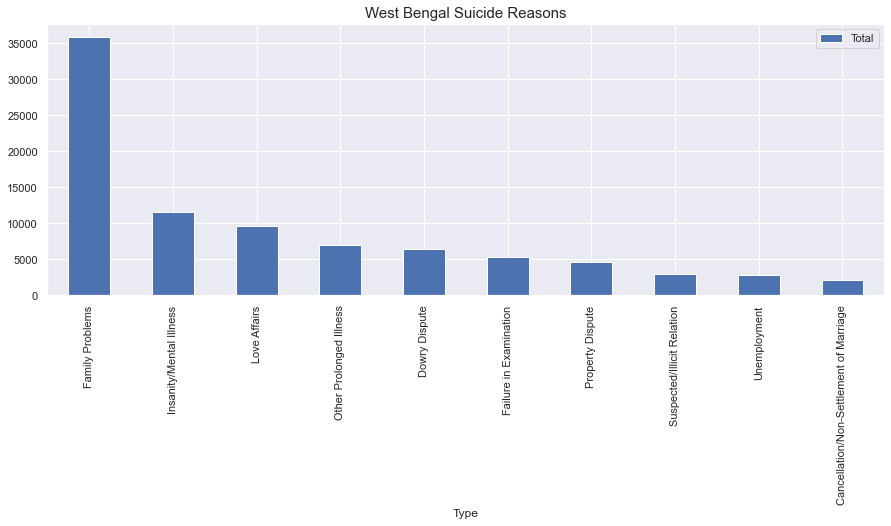

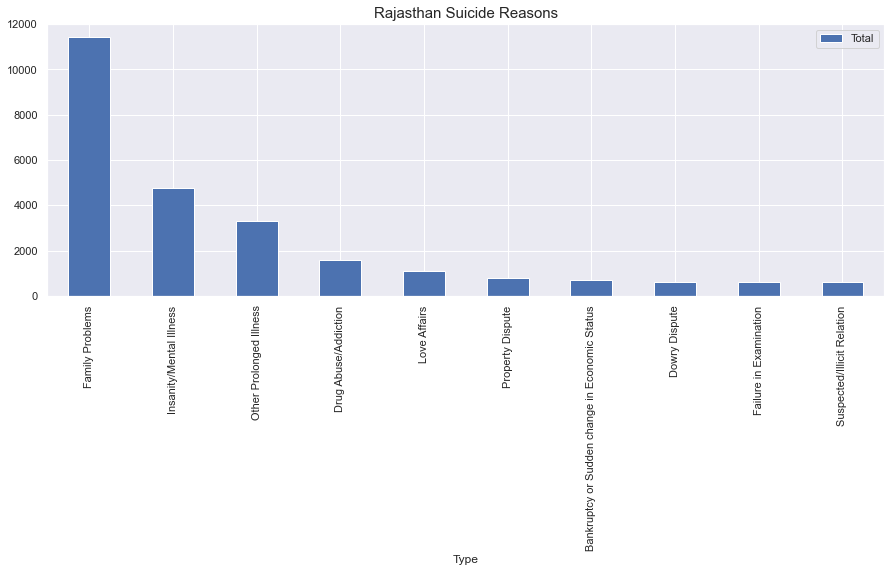

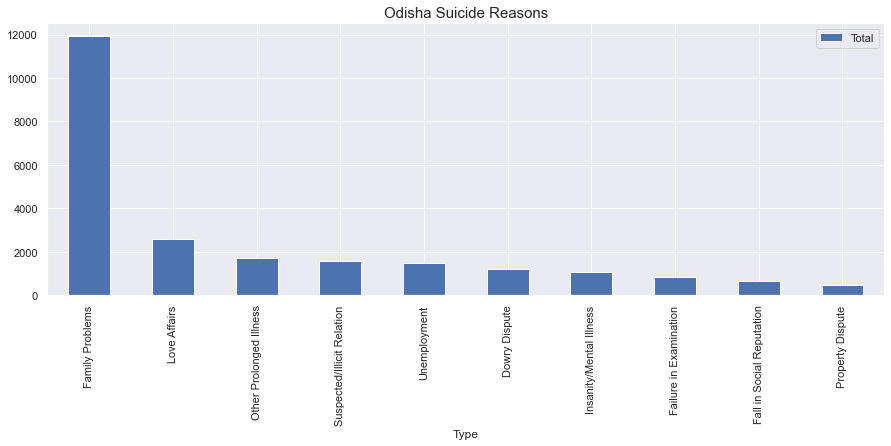

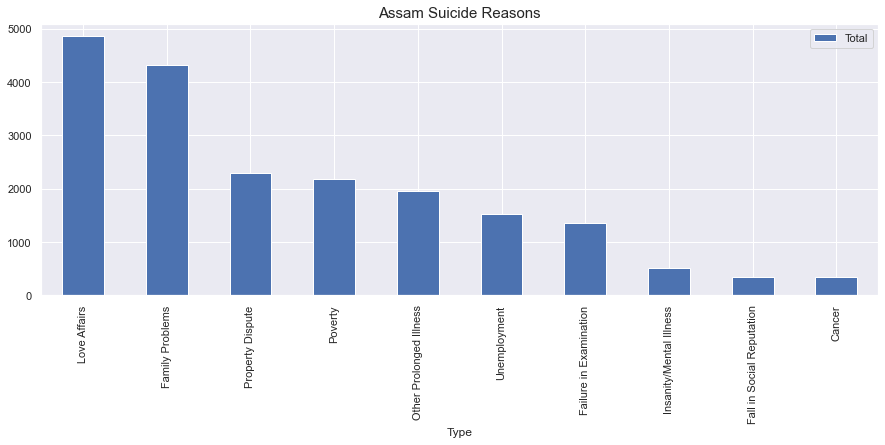

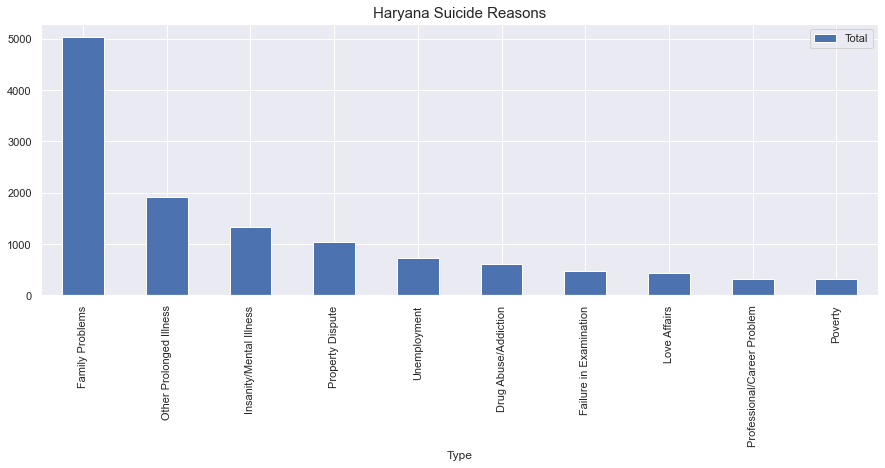

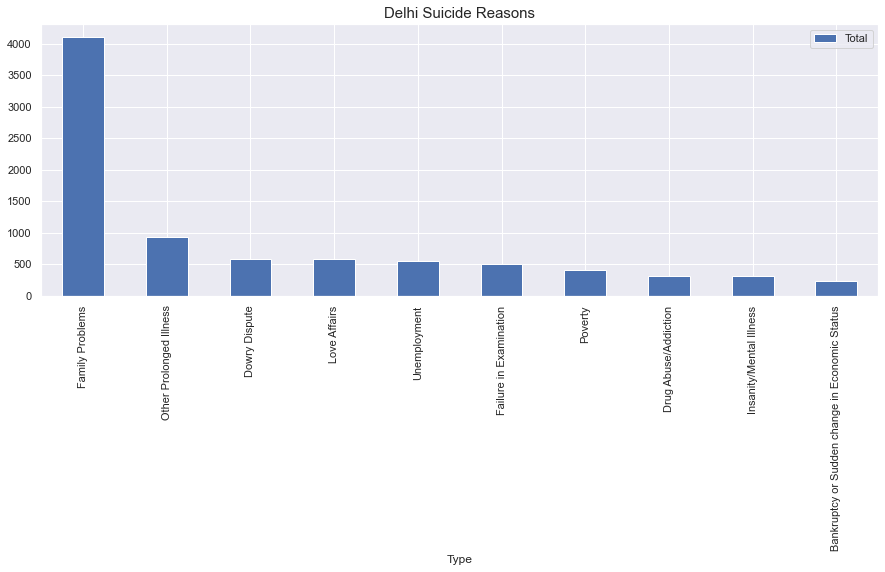

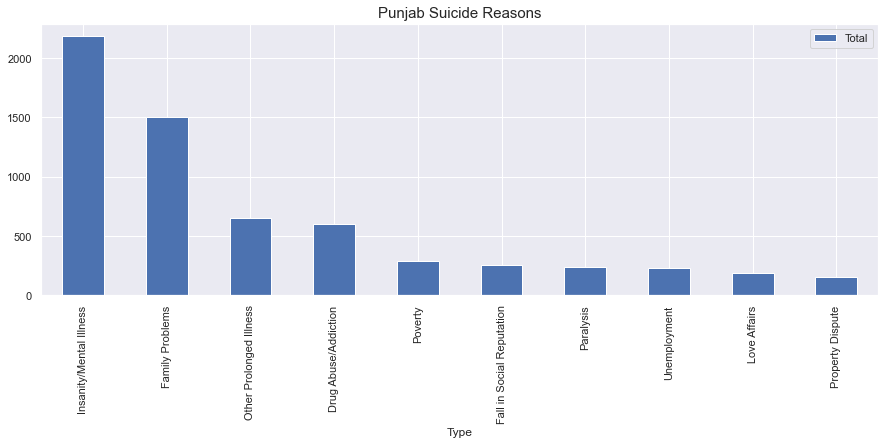

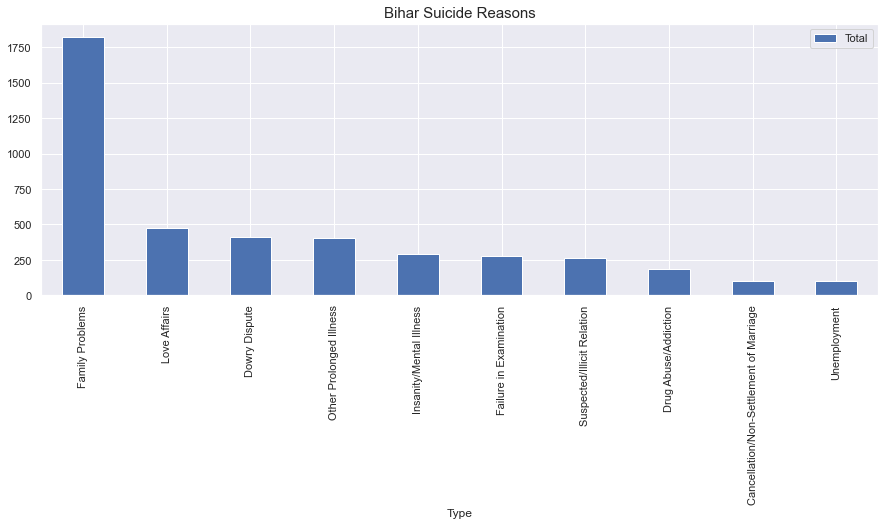

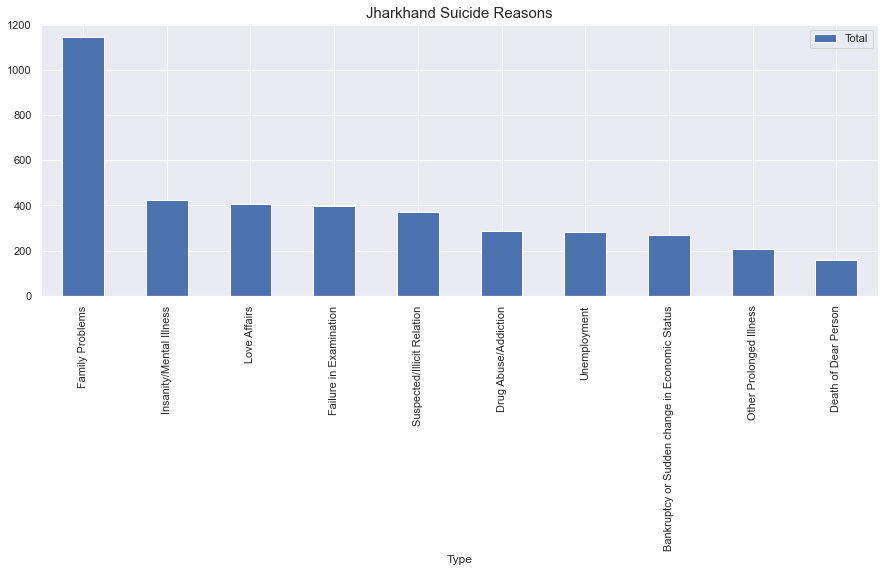

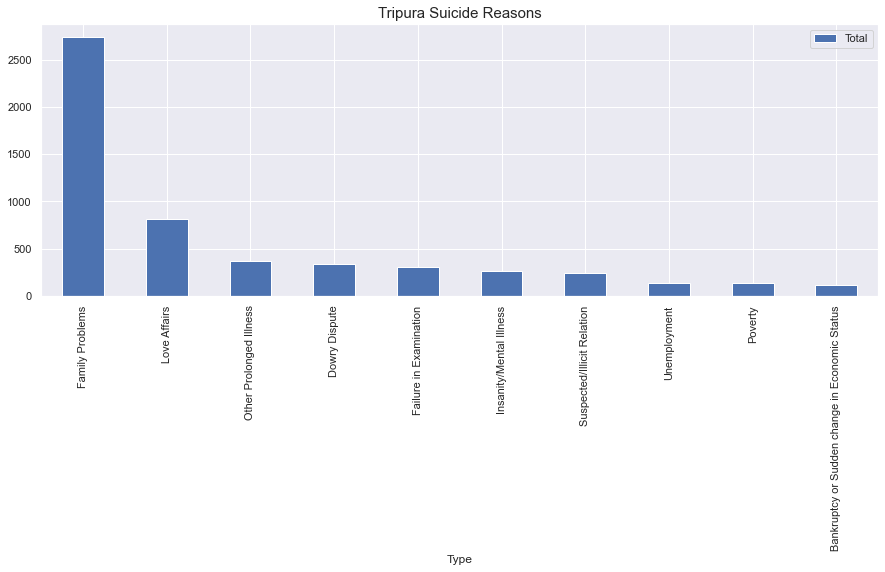

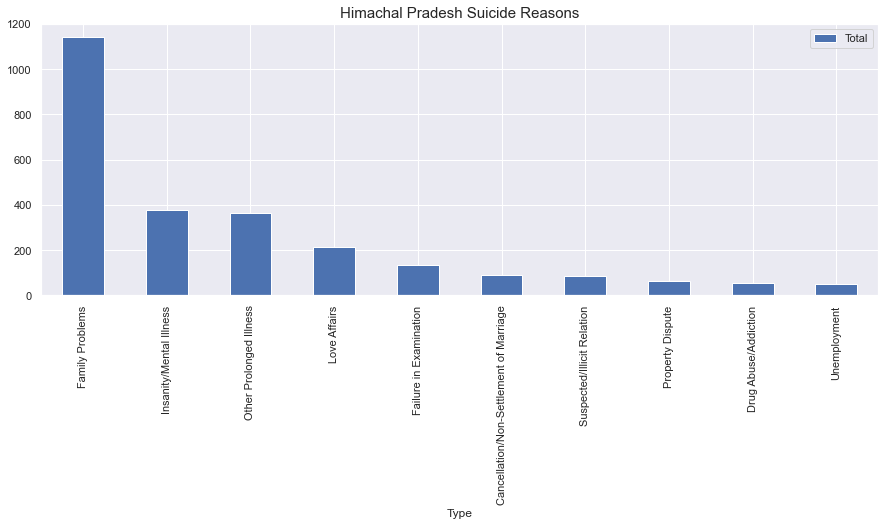

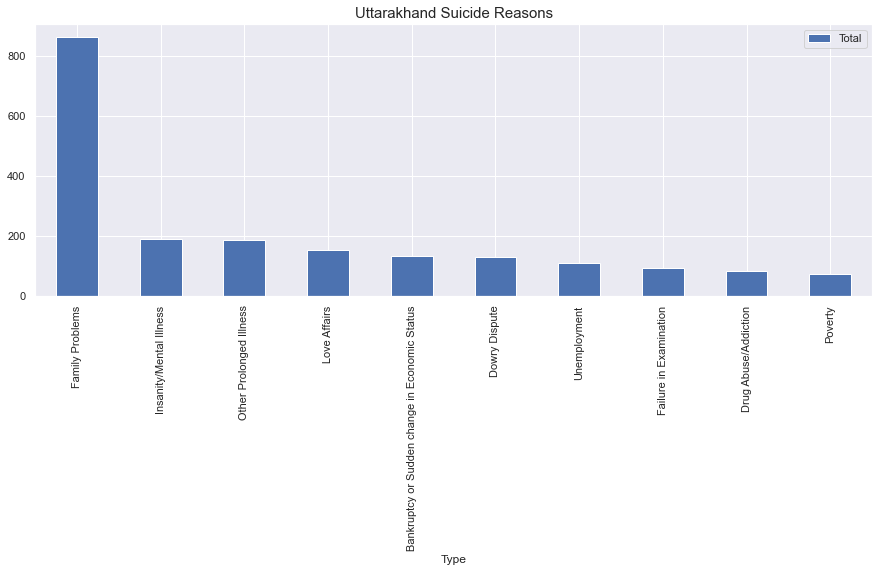

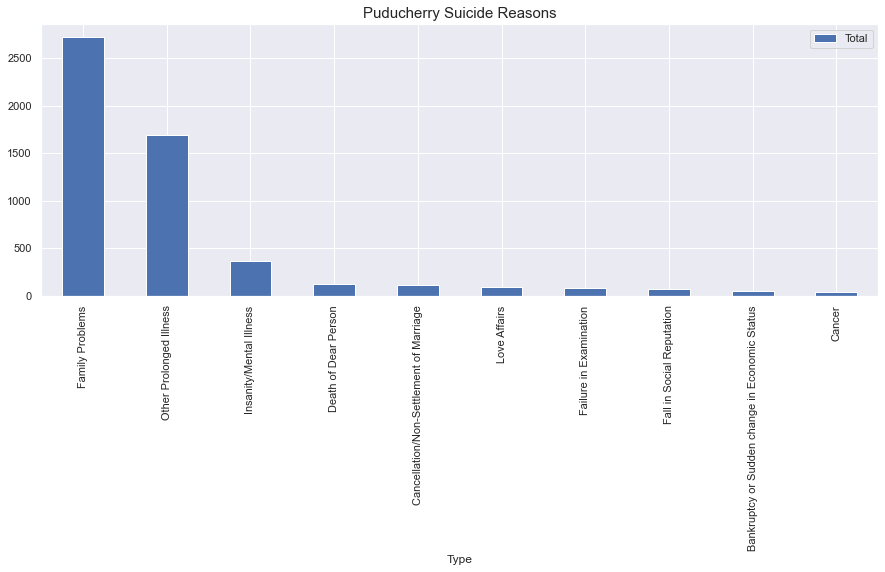

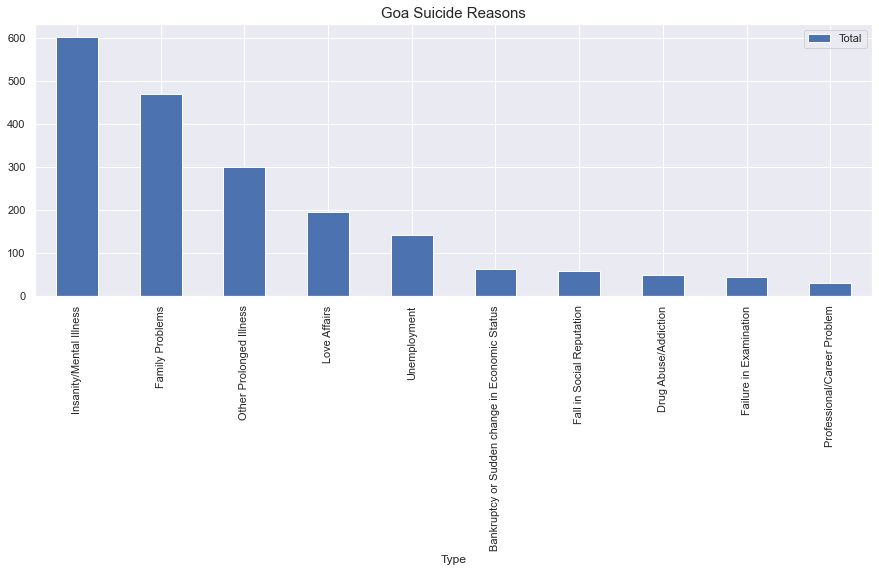

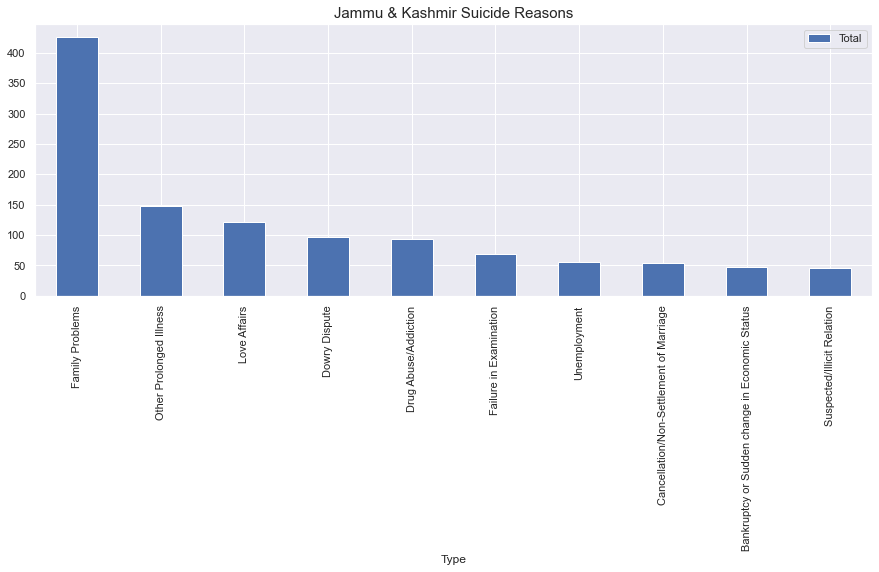

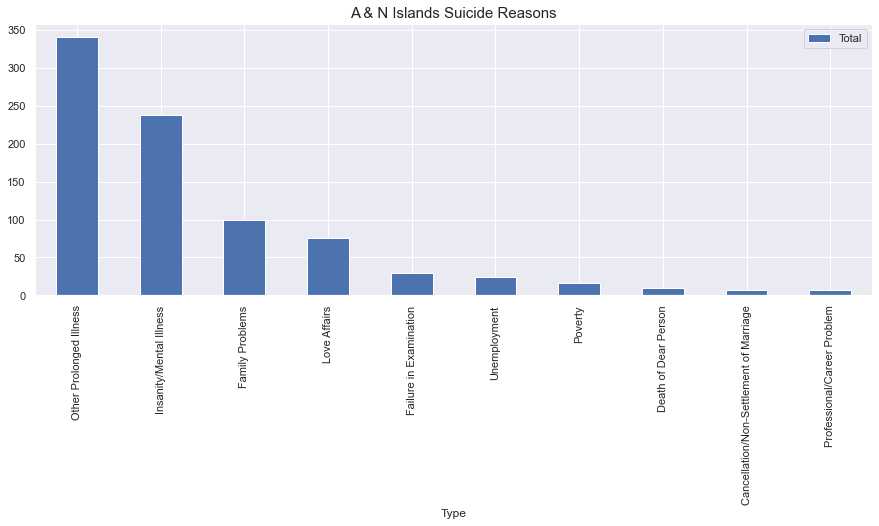

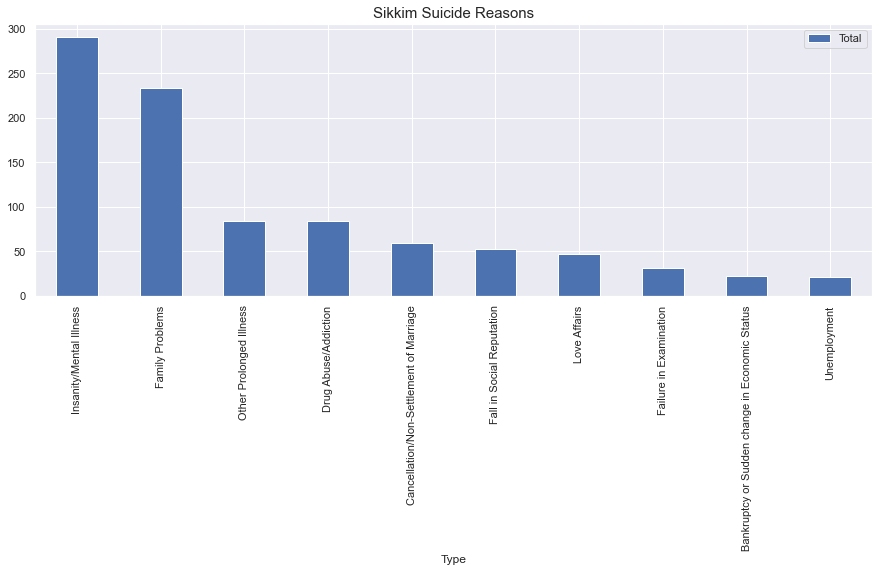

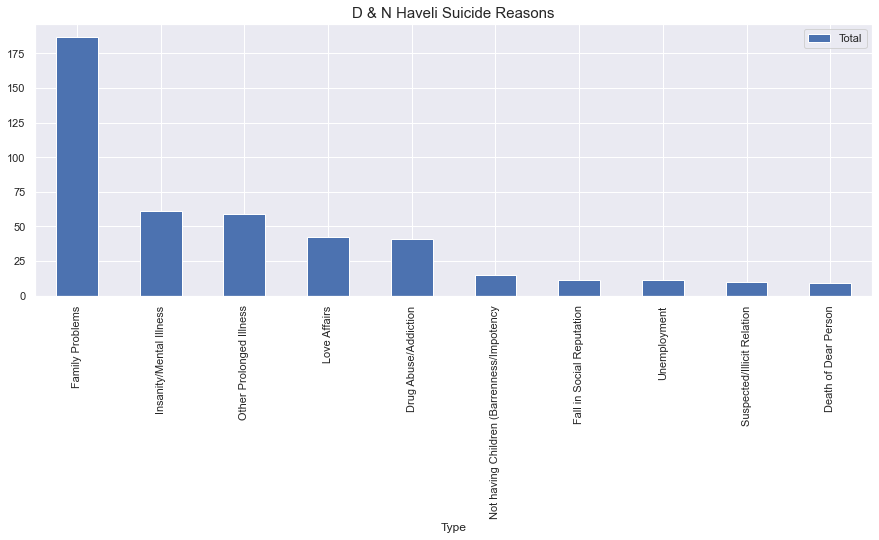

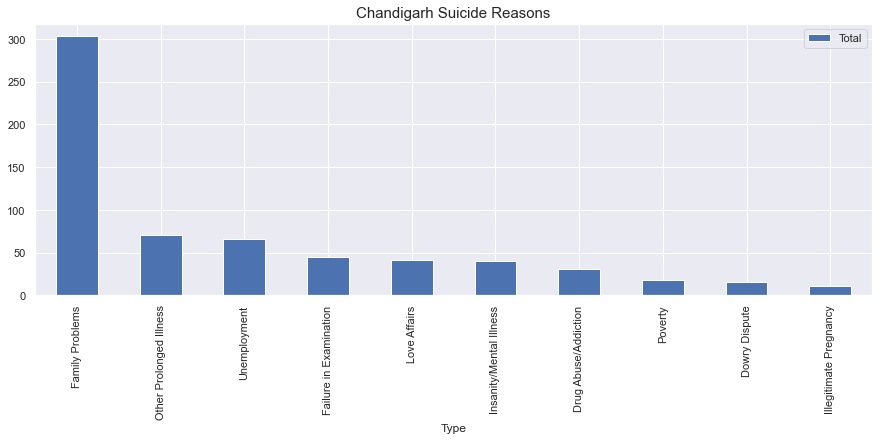

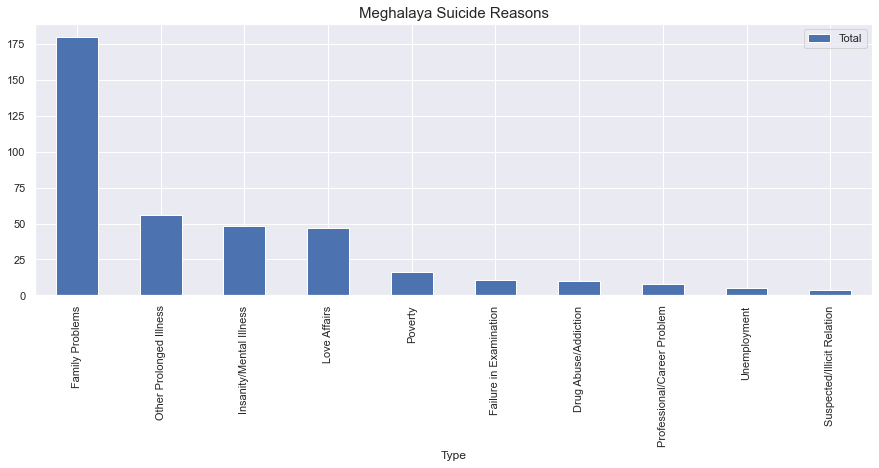

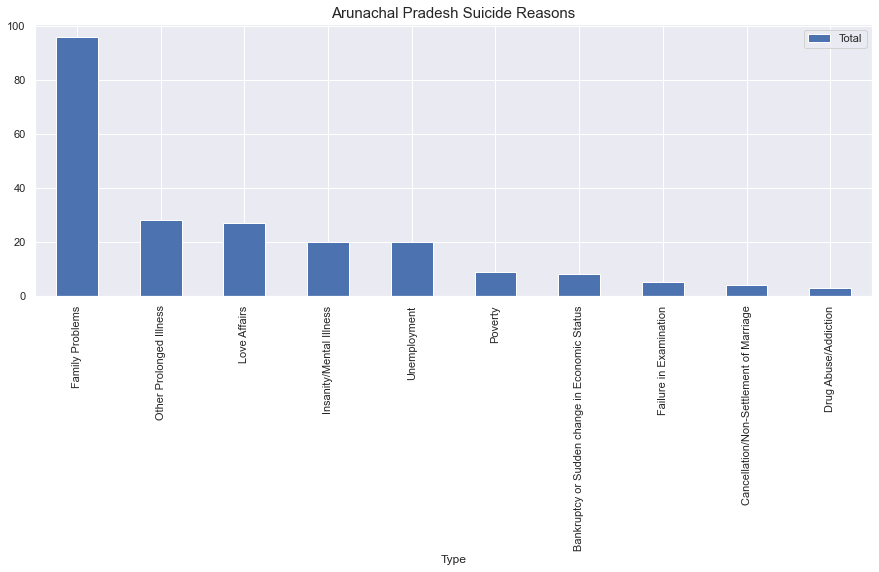

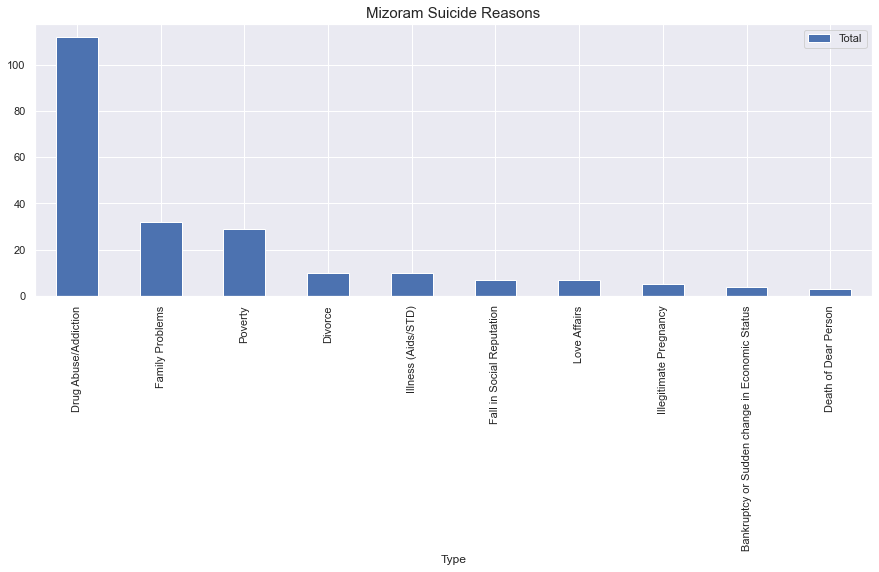

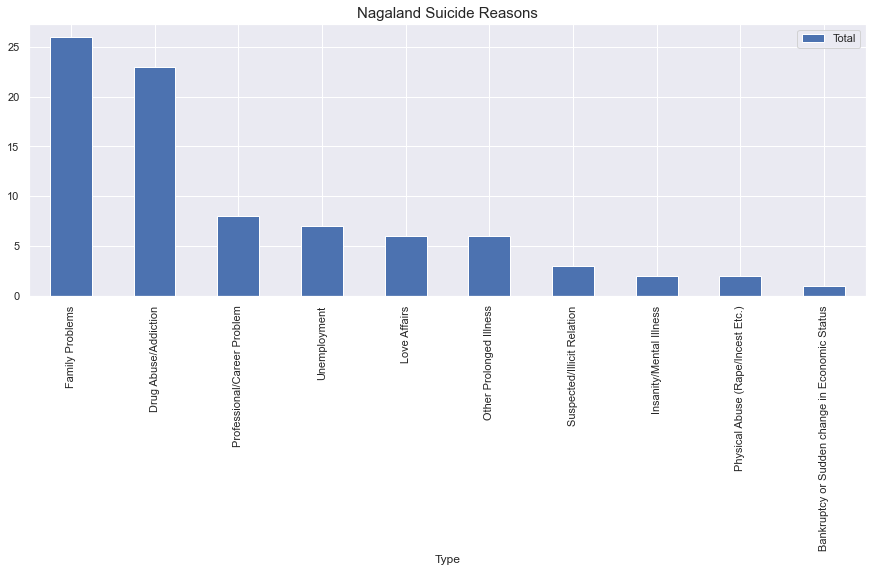

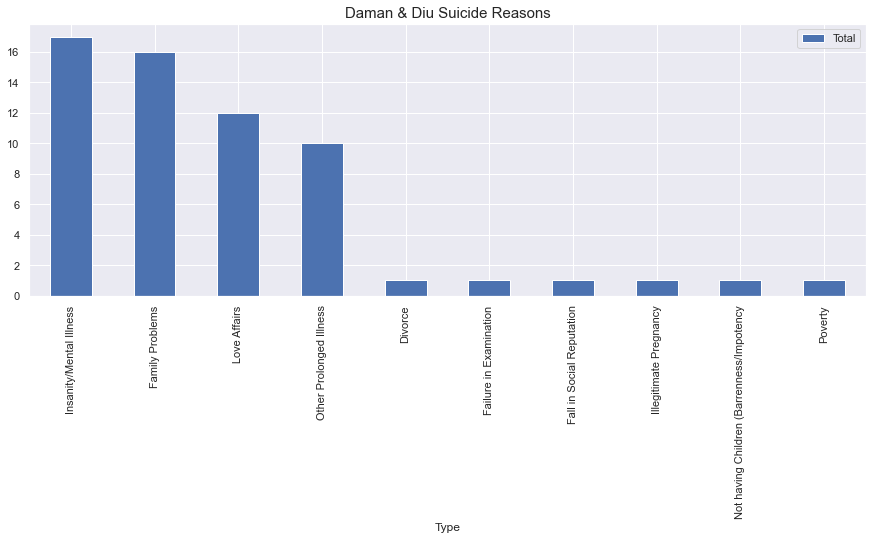

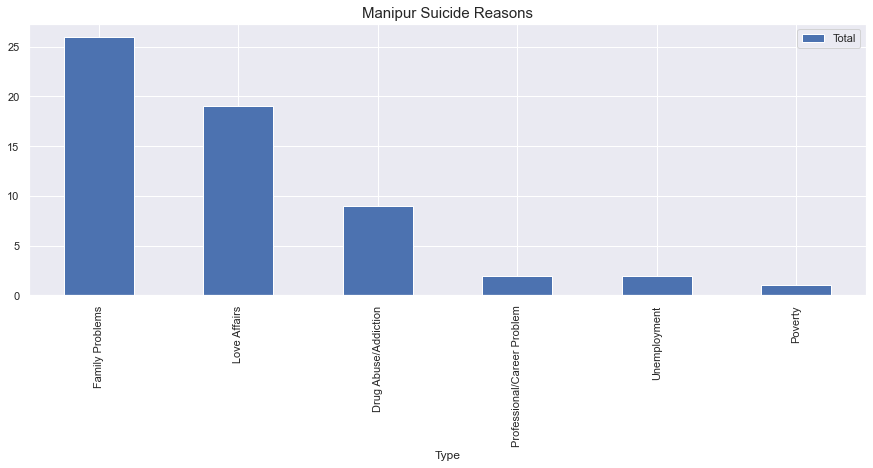

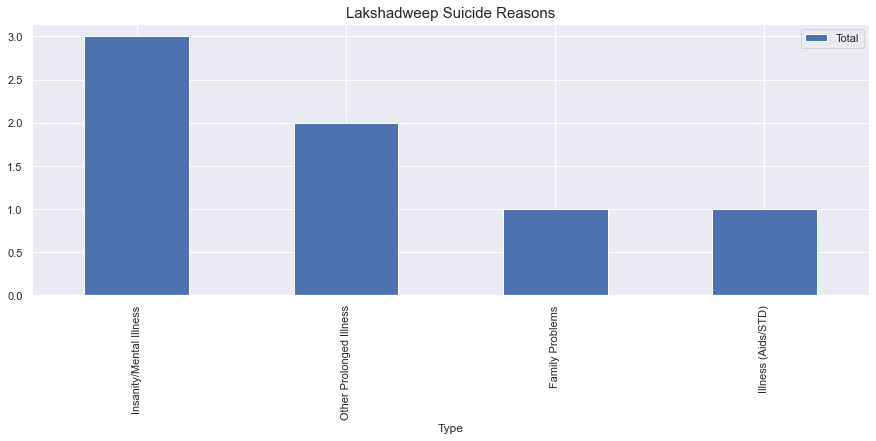

In [51]:
reasons_set = suicide_data[suicide_data['Type_code'] == 'Causes']
states_set = reasons_set[['Type','State','Total']]
states = reasons_set['State'].value_counts().index
states = list(states)
for x in states:
    grp_set = states_set[states_set['State'] == x ]
    grp_set =grp_set.groupby('Type').sum().sort_values('Total', ascending = False)
    grp_set = grp_set.head(10)
    grp_set.plot(kind = 'bar', figsize = (15,5))
    plt.title(x+ ' Suicide Reasons', fontsize = 15)
    plt.show()

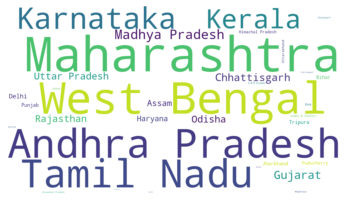

In [52]:
filter_state = pd.DataFrame(suicide_data.groupby(["State"])["Total"].sum()).reset_index()
from wordcloud import WordCloud
count = {}
for x in filter_state["State"].values:
    count[x]=int(filter_state[filter_state["State"]==x].Total)


wordcloud = WordCloud(width=1280,height=720,background_color='white').generate_from_frequencies(count)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Suicide trend over the years from 2001 to 2012 based on Year

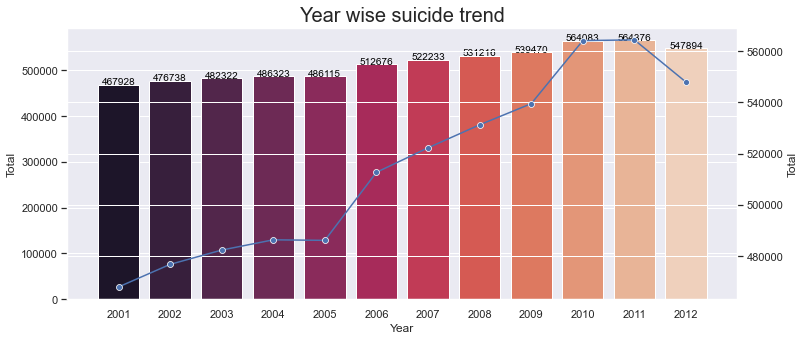

In [53]:
grp_yr = suicide_data.groupby('Year')['Total'].sum()
year = pd.DataFrame(grp_yr).reset_index().sort_values('Year',ascending=False)
fig, ax1 = plt.subplots(figsize=(12,5))
y = sns.barplot(x='Year',y='Total',data=year,palette = 'rocket',ax=ax1)
for index, row in year.iterrows():
    y.text(x = row.name, y = row.Total, s = str(row.Total),color='black', ha="center")
ax2 = ax1.twinx()
g=sns.lineplot(data = year['Total'], marker='o', sort = False, ax=ax2)
x = g.set_title('Year wise suicide trend', fontsize = 20)

Each year and their respective count of suicides which have grown exponentially over the years is depicted within the graph. It isn’t a good sign as wee find the count has a steep rise from the year 2009 to 2010.

In [54]:
#Set the index based on year
year = year.set_index('Year')
year

,Total
Year,
2012,547894
2011,564376
2010,564083
2009,539470
2008,531216
2007,522233
2006,512676
2005,486115
2004,486323


In [55]:
fig = px.pie(year, values = year['Total'], names = year.index)
fig.update_traces(textposition='inside', textinfo = 'percent+label')
fig.update_layout(
    title = 'Number of suicides per Year'
    ,font = dict(size = 10)
    ,template = 'seaborn' 
)
fig.show()

The pie chart depicts an increased suicide rate from 7.57% in 2001 to 9.13% in 2011.

#### Cause-wise analysis of each year

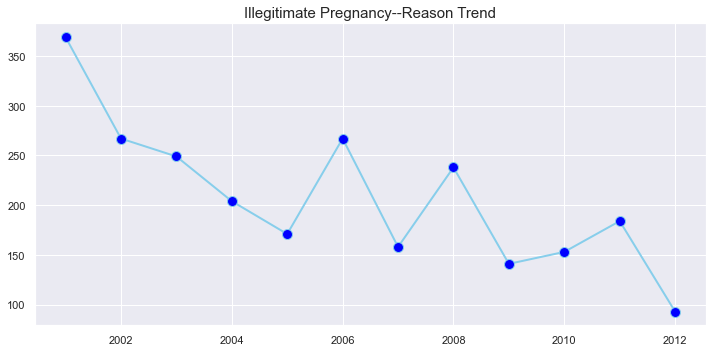

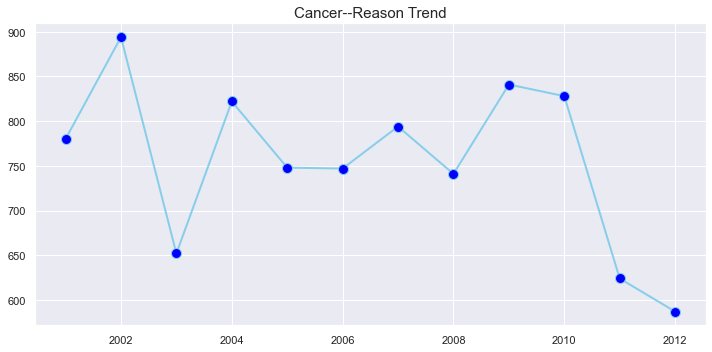

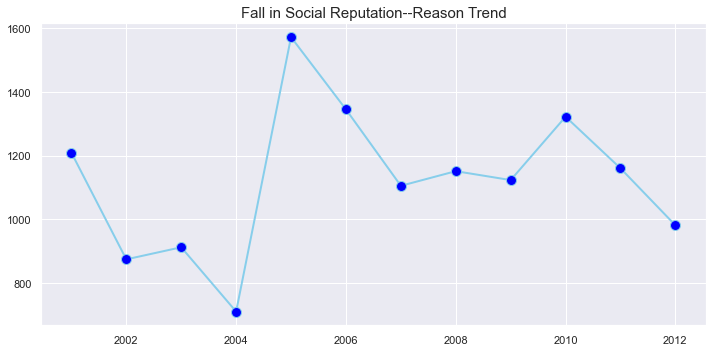

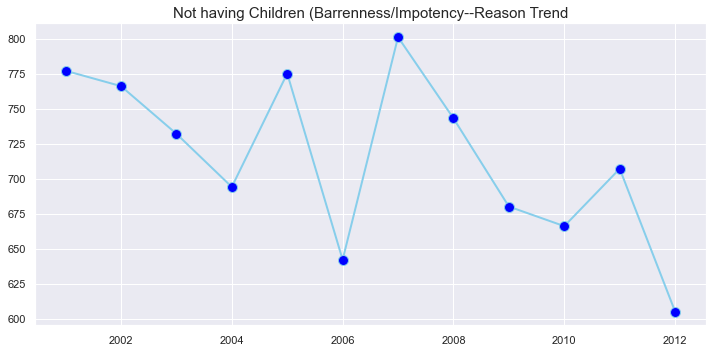

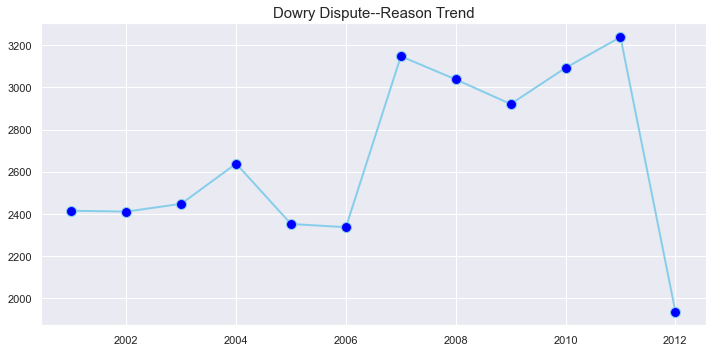

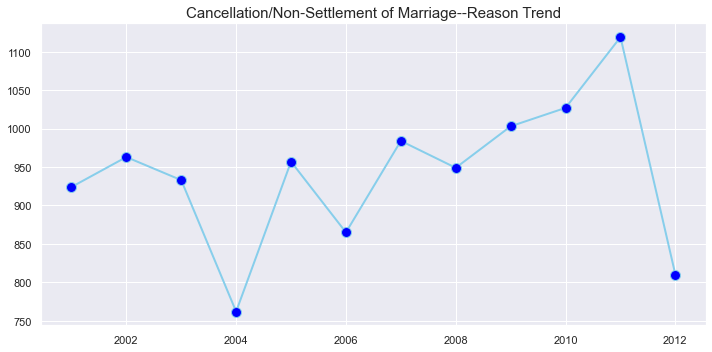

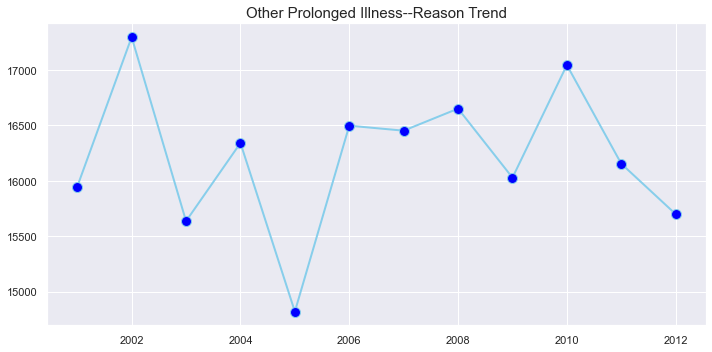

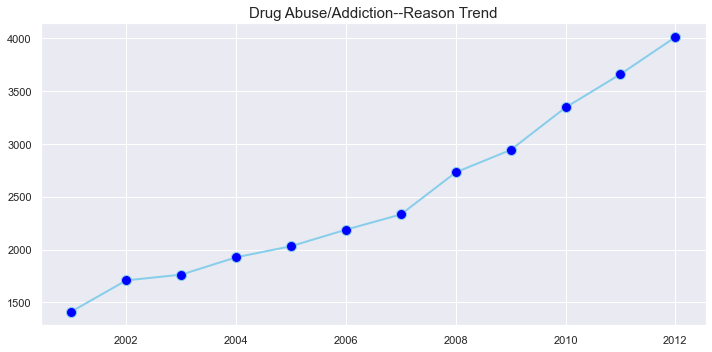

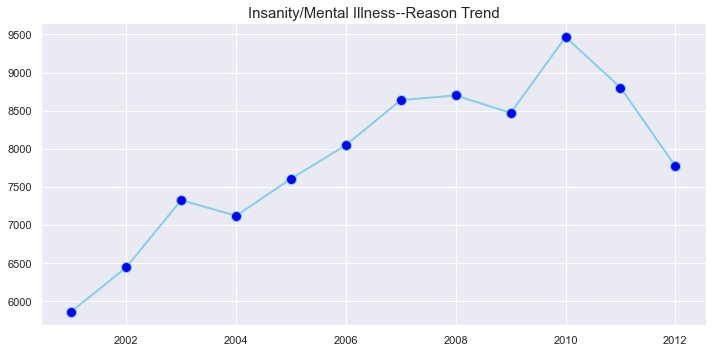

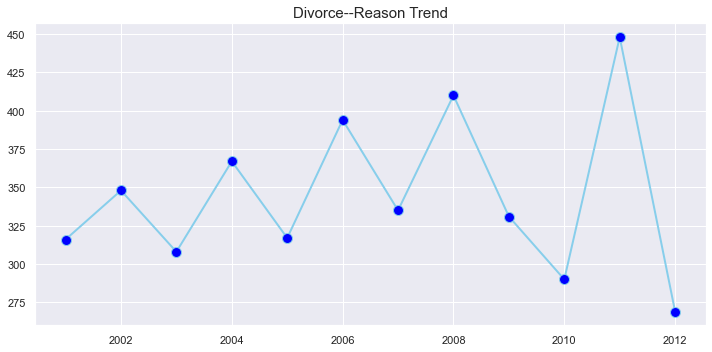

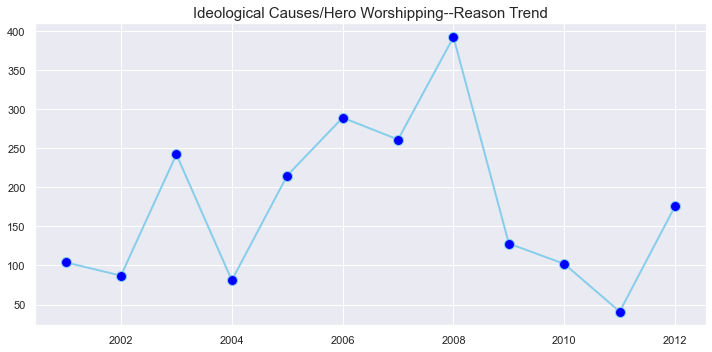

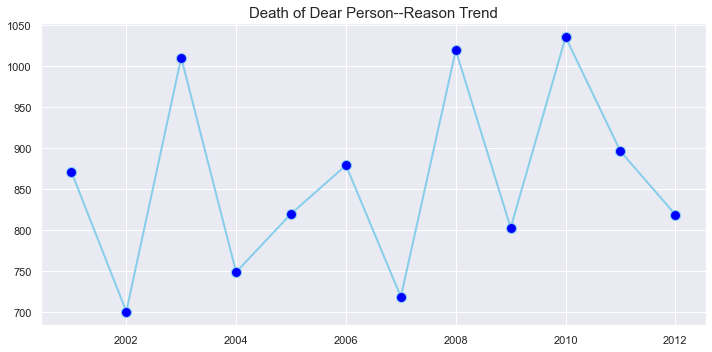

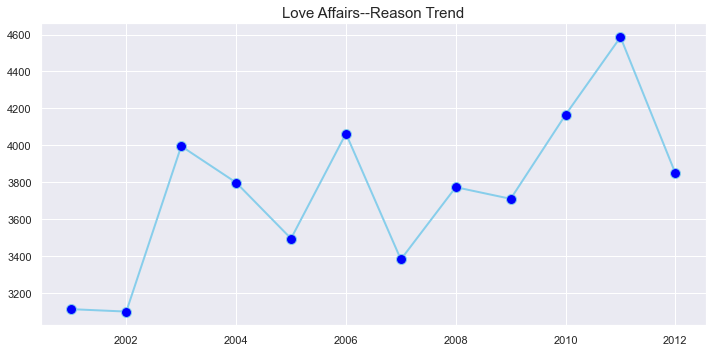

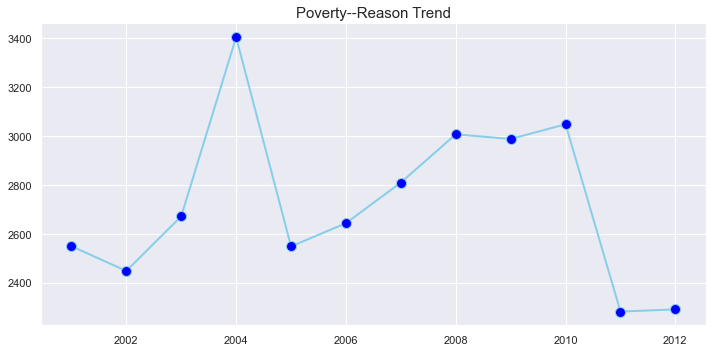

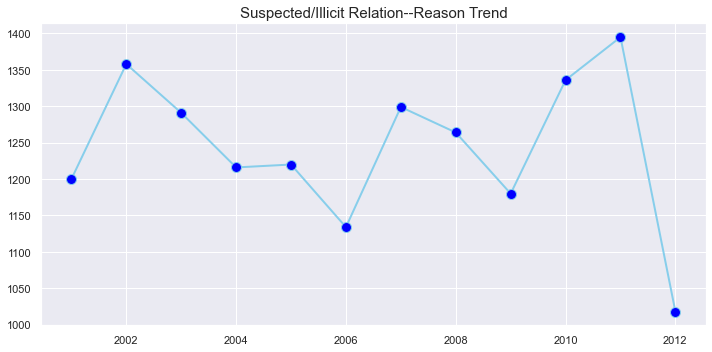

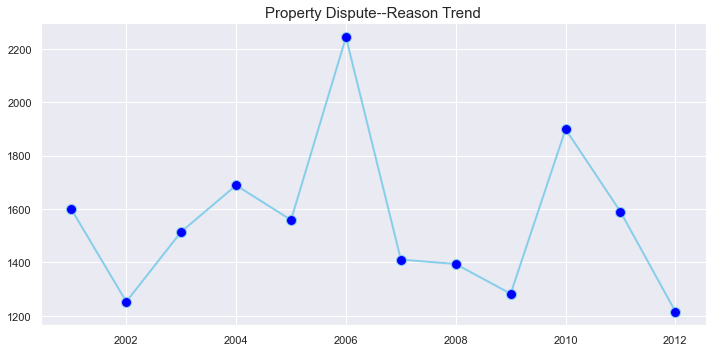

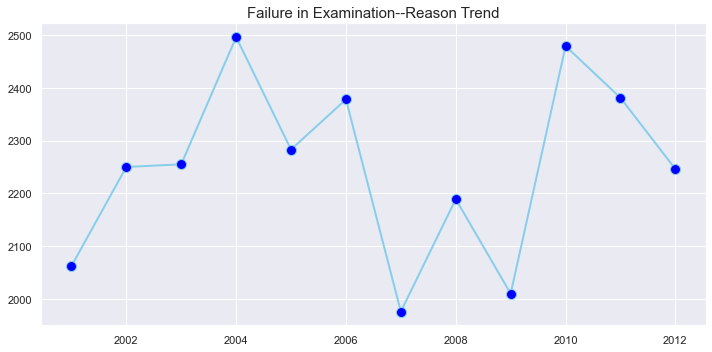

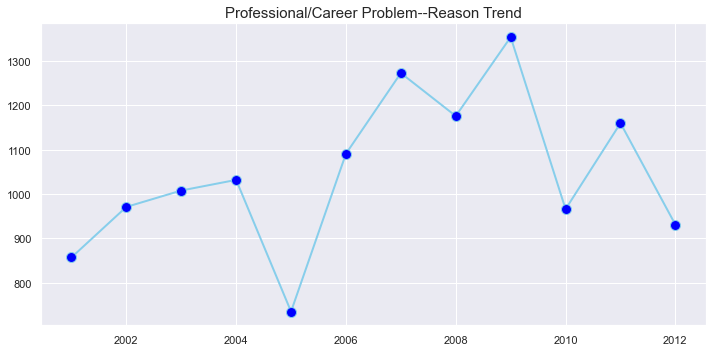

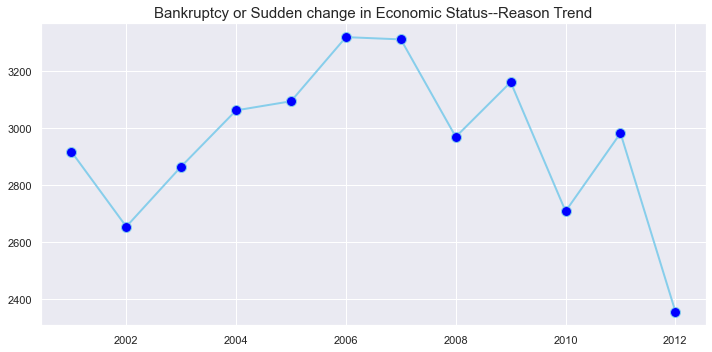

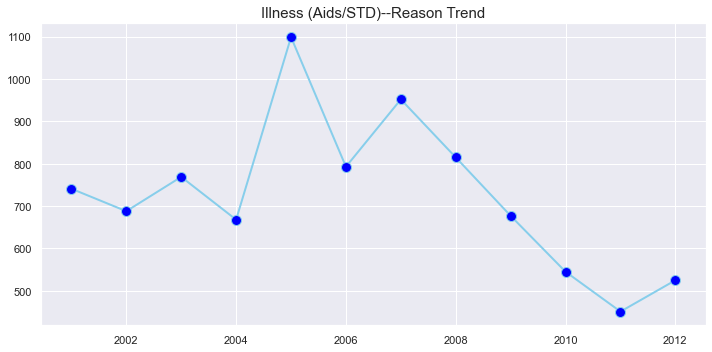

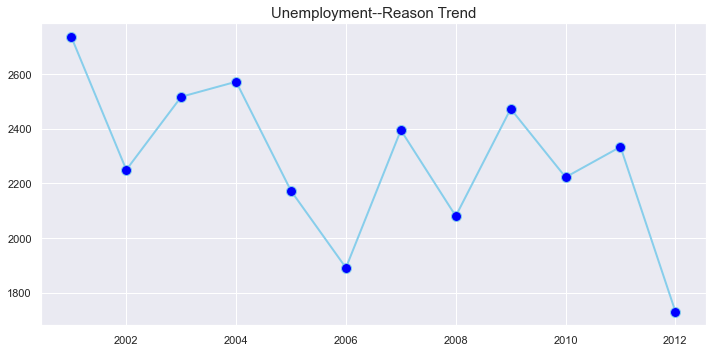

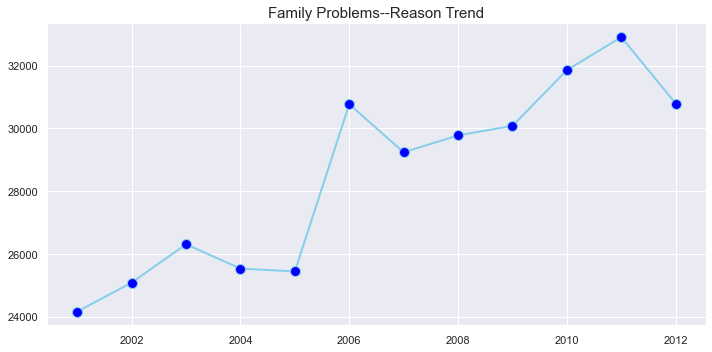

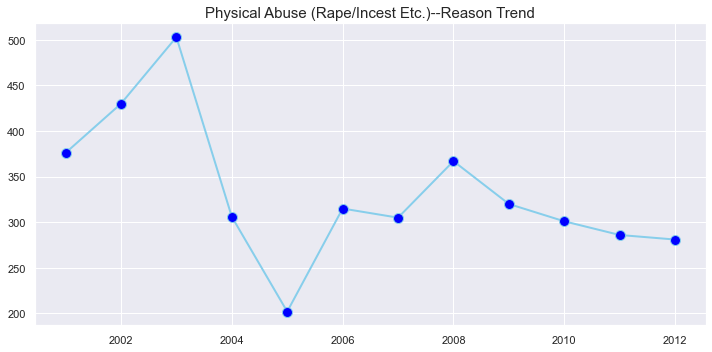

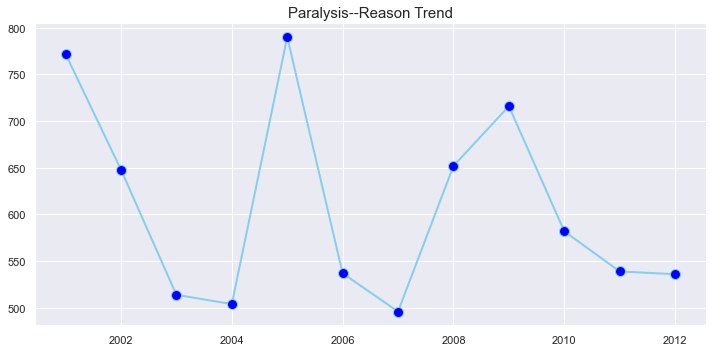

In [56]:
#Year wise, how the reasons are changing
year_reasons = reasons_set[['Year', 'Type', 'Total']]
year_reasons = year_reasons.groupby(['Type', 'Year']).sum().reset_index()
reasons = year_reasons['Type']
reasons = reasons.value_counts()
years = year_reasons['Year'].values
years = list(years)
count = 1
reasons = list(reasons.index)
for var in reasons:
    plt.rcParams.update({'font.size': 10})
    fig = plt.figure(figsize = (10,5))
    trace1 = year_reasons[year_reasons['Type'] == var]
    plt.plot( 'Year', 'Total', data=trace1, marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2)
    plt.title(var + '--Reason Trend', fontsize = 15)
    plt.tight_layout()
    plt.show()

Drug Abuse/Addiction trend is is linearly increasing -- More than doubled

Family problems also shows upward trend 3 .Unemployment trend is showing decline - Employment opportunites are growing

Love affairs show increased trend.

### Suicide trend over the years from 2001 to 2012 based on type_code

In [57]:
#Identifying the unique values of type_code 'Social_Status'
suicide_data_by_code = suicide_data[suicide_data['Type_code'] == 'Social_Status']
suicide_data_by_code['Type'].unique()

array(['Married', 'Never Married', 'Divorcee', 'Widowed/Widower',
       'Seperated'], dtype=object)

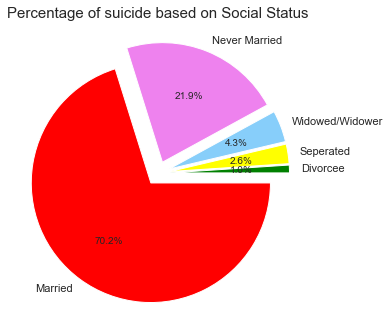

In [58]:
suicide_data_by_social = suicide_data_by_code.groupby('Type')['Total'].sum()
suicide_data_by_social_type = pd.DataFrame(suicide_data_by_social).reset_index().sort_values('Total')
labels = suicide_data_by_social_type['Type']
colors=['green','yellow','lightskyblue','violet','red']
explode = (0.1,0.1,0.1,0.1,0.1)
plt.title("Percentage of suicide based on Social Status", fontsize = 15)
plt.pie(suicide_data_by_social_type['Total'],labels = labels, colors=colors, autopct='%1.1f%%',explode = explode,shadow=False)
fig = plt.gcf()
fig.set_size_inches(20,5.5)
plt.show()

In [59]:
#Identifying the unique values of type_code 'Education_Status'
suicide_data_by_code = suicide_data[suicide_data['Type_code'] == 'Education_Status']
suicide_data_by_code['Type'].unique()

array(['No Education', 'Middle', 'Primary', 'Matriculate/Secondary',
       'Graduate', 'Hr. Secondary/Intermediate/Pre-Universit',
       'Post Graduate and Above', 'Diploma'], dtype=object)

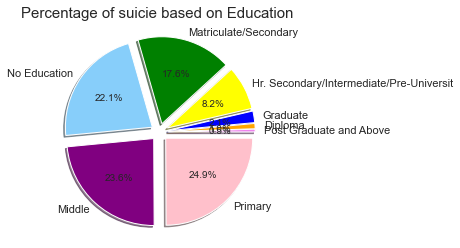

In [60]:
suicide_data_by_education = suicide_data_by_code.groupby('Type')['Total'].sum()
suicide_data_by_education_type = pd.DataFrame(suicide_data_by_education).reset_index().sort_values('Total')
labels = suicide_data_by_education_type['Type']
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.title("Percentage of suicie based on Education ", fontsize = 15)
colors=['violet','orange','blue','yellow','green','lightskyblue','purple','pink']
plt.pie(suicide_data_by_education_type['Total'],labels = labels, colors=colors, explode=explode, autopct='%1.1f%%',shadow=True)
plt.show()

In [61]:
#Identifying the unique values of type_code 'Professional_Profile'
suicide_data_by_code = suicide_data[suicide_data['Type_code'] == 'Professional_Profile']
suicide_data_by_code['Type'].unique()

array(['Student', 'House Wife', 'Service (Private)',
       'Public Sector Undertaking', 'Service (Government)',
       'Farming/Agriculture Activity', 'Retired Person',
       'Self-employed (Business activity)', 'Unemployed',
       'Professional Activity'], dtype=object)

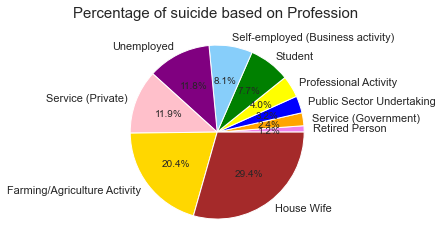

In [62]:
suicide_data_by_profession = suicide_data_by_code.groupby('Type')['Total'].sum()
suicide_data_by_profession_type = pd.DataFrame(suicide_data_by_profession).reset_index().sort_values('Total')
labels = suicide_data_by_profession_type['Type']
explode=(0,0,0,0,0,0,0,0,0,0)
plt.title("Percentage of suicide based on Profession ", fontsize = 15)
colors=['violet','orange','blue','yellow','green','lightskyblue','purple','pink','gold','brown']
plt.pie(suicide_data_by_profession_type['Total'],labels = labels, colors=colors, explode=explode, autopct='%1.1f%%')
plt.show()

In [63]:
#Identifying the unique values of type_code 'Means_adopted'
suicide_data_by_code = suicide_data[suicide_data['Type_code'] == 'Means_adopted']
suicide_data_by_code['Type'].unique()

array(['By Hanging', 'By Fire/Self Immolation',
       'By Consuming Other Poison', 'By Drowning',
       'By Consuming Insecticides', 'By touching electric wires',
       'By Fire-Arms', 'By Overdose of sleeping pills',
       'By coming under running vehicles/trains',
       'By Jumping off Moving Vehicles/Trains',
       'By Jumping from (Other sites)', 'By Over Alcoholism',
       'By Jumping from (Building)', 'By Self Infliction of injury',
       'By Machine'], dtype=object)

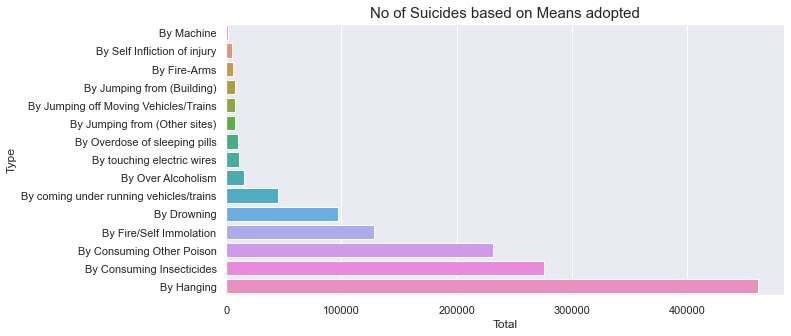

In [64]:
suicide_data_by_means = suicide_data_by_code.groupby('Type')['Total'].sum()
suicide_data_by_means_type = pd.DataFrame(suicide_data_by_means).reset_index().sort_values('Total')
fig , ax = plt.subplots(figsize=(10,5))
g = sns.barplot(x = suicide_data_by_means_type['Total'], y = suicide_data_by_means_type['Type'])
x = g.set_title('No of Suicides based on Means adopted', fontsize = 15)

In [65]:
#Identifying the unique values of type_code 'Causes'
suicide_data_by_code = suicide_data[suicide_data['Type_code'] == 'Causes']
suicide_data_by_code['Type'].unique()

array(['Love Affairs', 'Other Prolonged Illness',
       'Failure in Examination', 'Family Problems',
       'Insanity/Mental Illness', 'Death of Dear Person', 'Unemployment',
       'Fall in Social Reputation', 'Suspected/Illicit Relation',
       'Cancellation/Non-Settlement of Marriage',
       'Not having Children (Barrenness/Impotency', 'Poverty',
       'Professional/Career Problem', 'Paralysis',
       'Bankruptcy or Sudden change in Economic Status', 'Divorce',
       'Cancer', 'Property Dispute', 'Illness (Aids/STD)',
       'Physical Abuse (Rape/Incest Etc.)', 'Drug Abuse/Addiction',
       'Ideological Causes/Hero Worshipping', 'Dowry Dispute',
       'Illegitimate Pregnancy'], dtype=object)

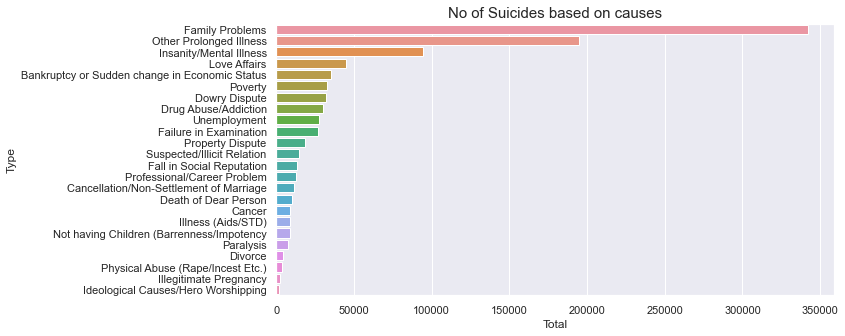

In [66]:
suicide_data_by_causes = suicide_data_by_code.groupby('Type')['Total'].sum()
suicide_data_by_causes_type = pd.DataFrame(suicide_data_by_causes).reset_index().sort_values('Total',ascending = False )
fig , ax = plt.subplots(figsize=(10,5))
g = sns.barplot(x = suicide_data_by_causes_type['Total'], y = suicide_data_by_causes_type['Type'])
x = g.set_title('No of Suicides based on causes', fontsize = 15)

### Suicide trend over the years from 2001 to 2012 based on Age_group

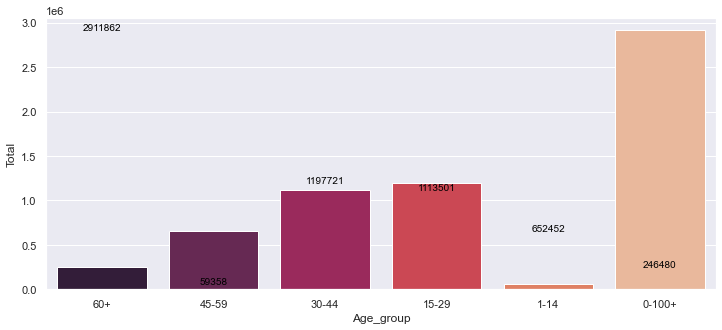

In [67]:
grp_ag = suicide_data.groupby('Age_group')['Total'].sum()
age = pd.DataFrame(grp_ag).reset_index().sort_values('Age_group',ascending=False)
fig, ax = plt.subplots(figsize=(12,5))
g = sns.barplot(x='Age_group',y='Total',data=age,palette = 'rocket',ax=ax)
for index, row in age.iterrows():
    g.text(x = row.name, y = row.Total, s = str(row.Total),color='black', ha="center")

#### Cause-wise analysis of each age group

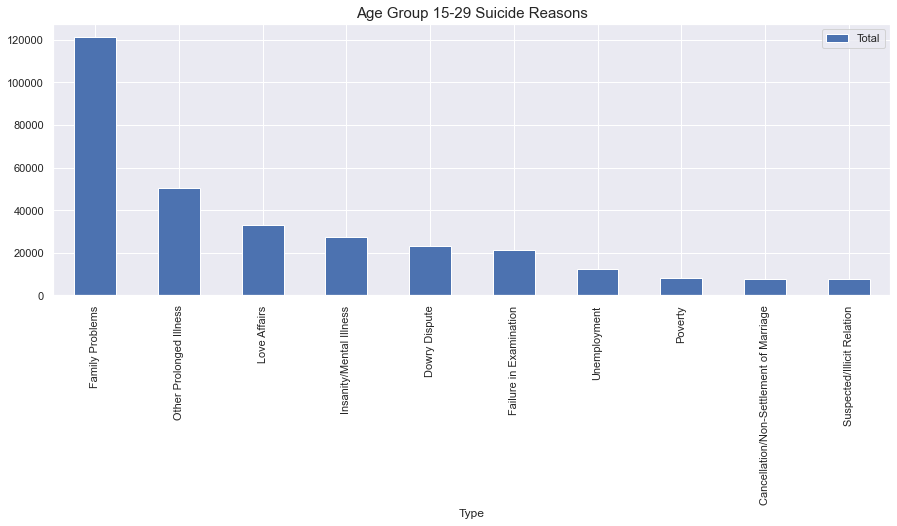

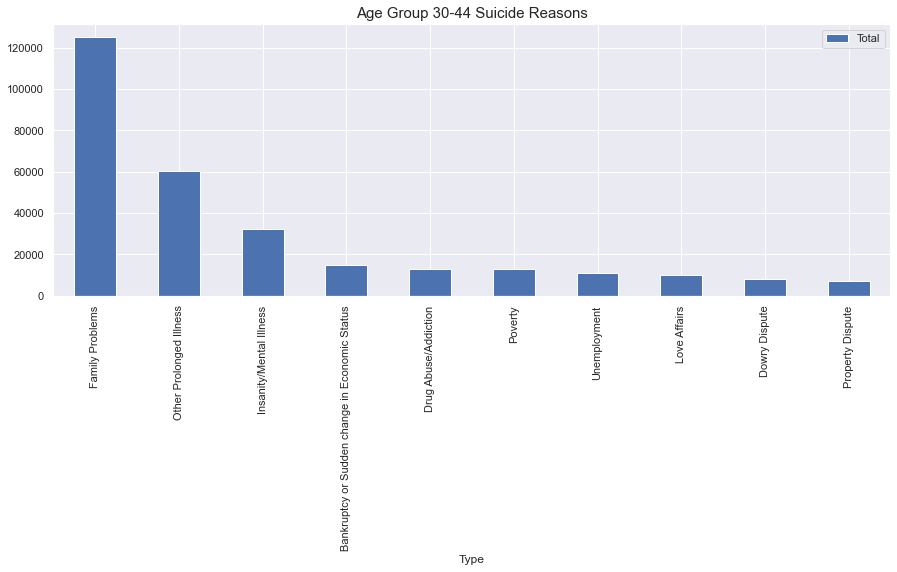

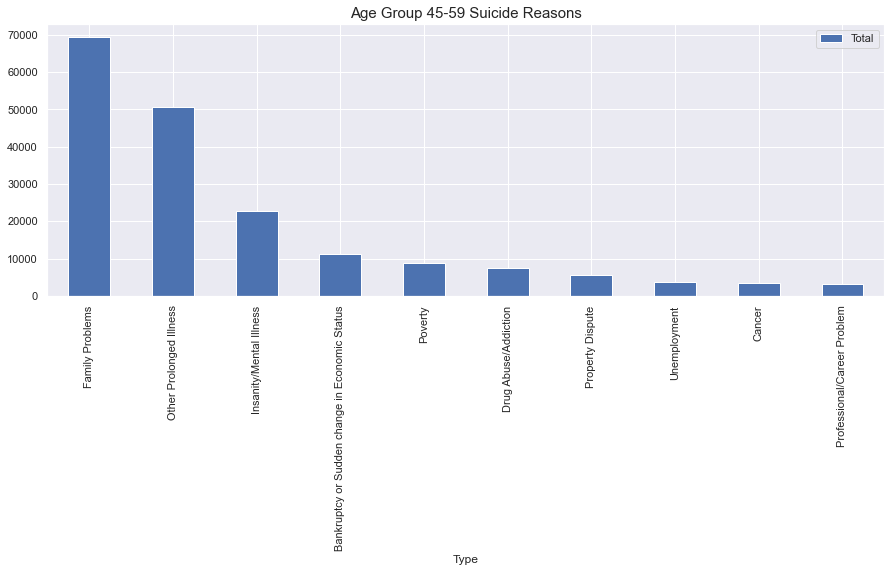

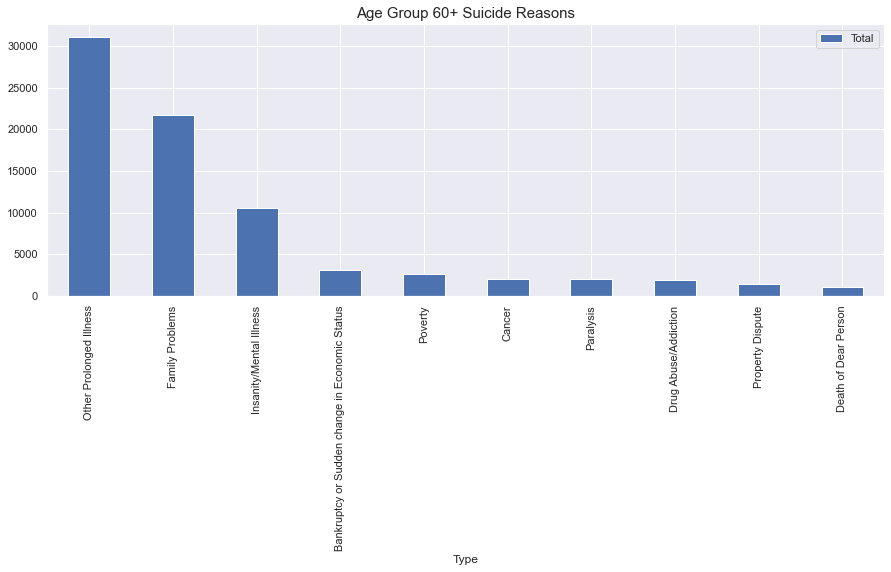

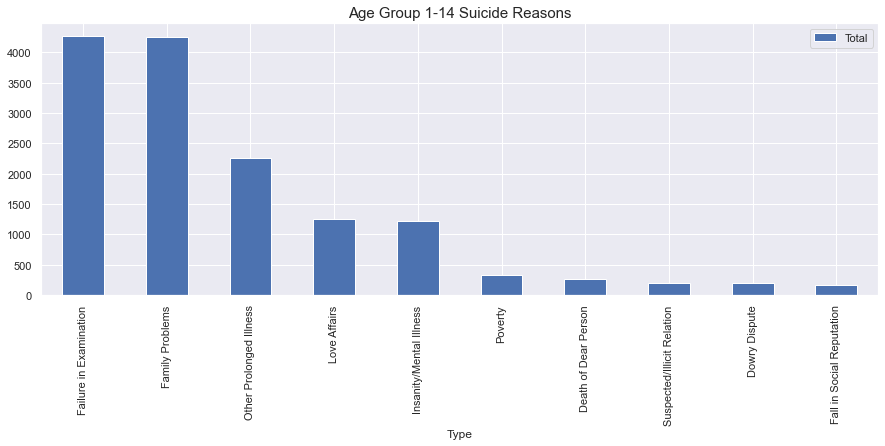

In [68]:
age_set = reasons_set[['Type','Age_group','Total']]
age_grp = reasons_set['Age_group'].value_counts().index
age_grp = list(age_grp)
for x in age_grp:
    group_set = age_set[age_set['Age_group'] == x ]
    group_set =group_set.groupby('Type').sum().sort_values('Total', ascending = False)
    group_set = group_set.head(10)
    group_set.plot(kind = 'bar', figsize = (15,5))
    plt.title('Age Group '+x+ ' Suicide Reasons', fontsize = 15)
    plt.show()

###### From top 10 Reasons of each age group the following observation were drawn:


Age group 0-14, 15-29 Love affairs is one of the top ten reasons

Age group 0-14 --Failure in Examination is the second Strong reason -- Sad to note this.

Family Problems is the strongest reason in all the age groups -- Are we still proud of our family sytems?.

Prolonged illness is the strongest reason for age group Age 60+ -- This is some what anticipated

Ingeneral illness is appearing as the strongest reason irrespective of age group and gender

### Suicide trend over the years from 2001 to 2012 based on gender

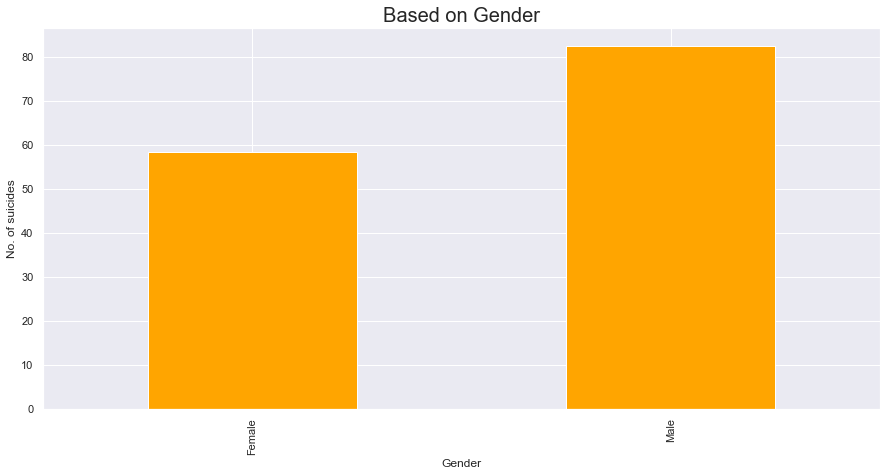

In [69]:
suicide_data.groupby("Gender")["Total"].mean()[:10].plot(kind = "bar", color = "orange", figsize = (15,7))
plt.ylabel("No. of suicides")
x = plt.title("Based on Gender", fontsize = 20)

<Figure size 1440x720 with 0 Axes>

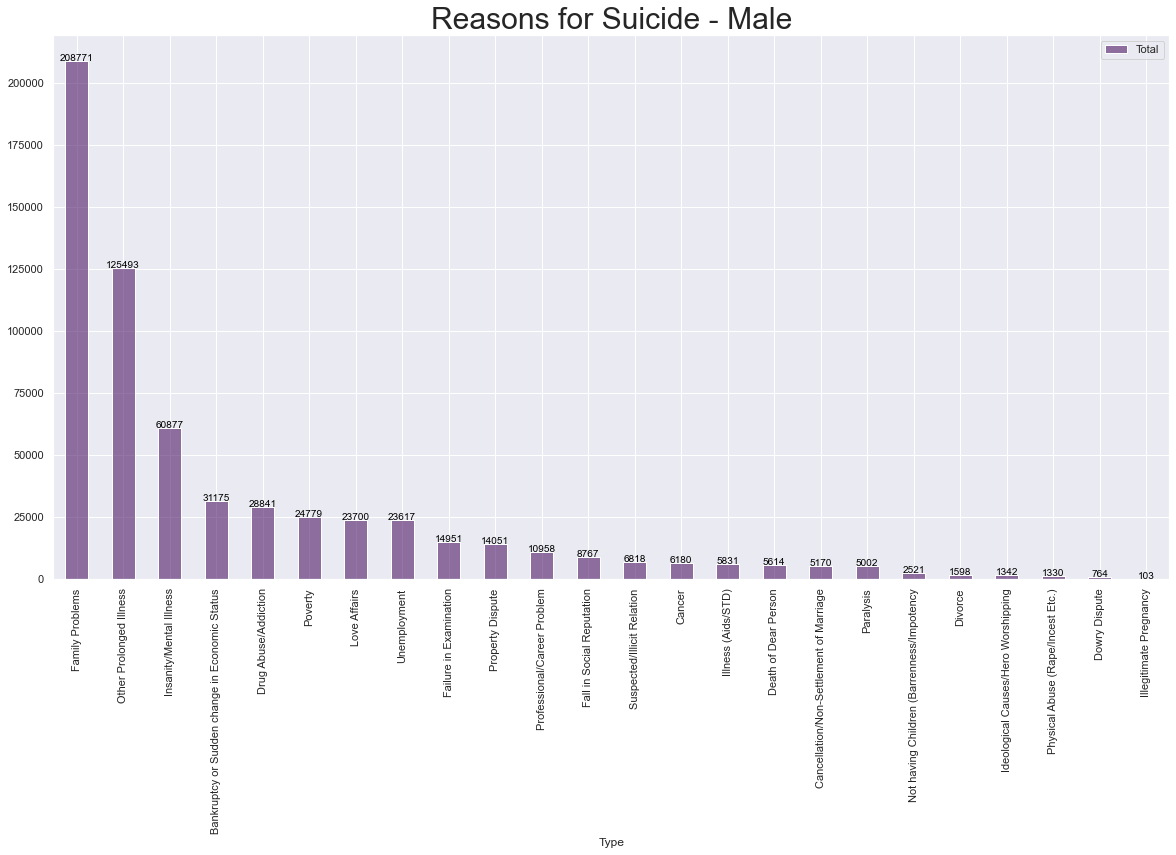

In [70]:
gender_set = reasons_set[['Type', 'Gender', 'Total']]
male_set = gender_set[gender_set['Gender'] == 'Male']
male_set = male_set.groupby('Type').sum().reset_index()
male_set = male_set.sort_values('Total', ascending = False)
male_set = male_set.reset_index(drop=True)
plt.figure(figsize = (20,10))
g = male_set.plot(kind = 'bar', x = 'Type', figsize = (20,10), color = (0.3,0.1,0.4,0.6))
plt.xticks(rotation = 90)
for index, row in male_set.iterrows():
    g.text(x = row.name, y = row.Total, s = str(row.Total),color='black', ha="center")
plt.title('Reasons for Suicide - Male', fontsize = 30)
plt.show()

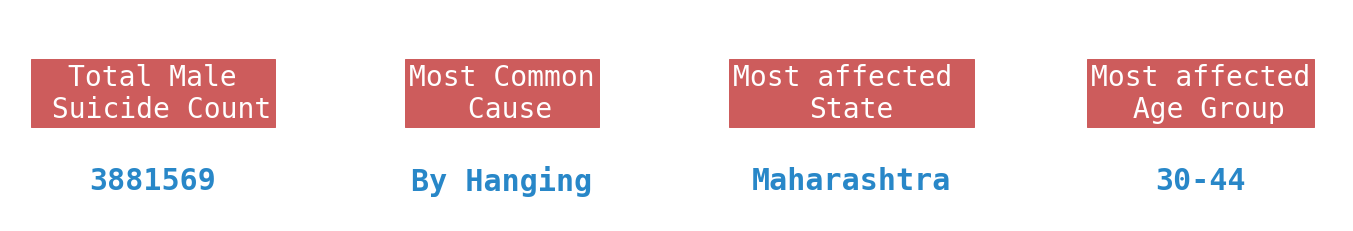

In [71]:
#Total Summary of Male Who Committed Suicides in India
col = ['Total Male\n Suicide Count', 'Most Common\n Cause', 'Most affected \nState', 'Most affected\n Age Group',]

values = [suicide_data.groupby('Gender').sum()['Total']['Male'],'By Hanging','Maharashtra','30-44']

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
axes = axes.flatten()
fig.set_facecolor('white')

for ind, col in enumerate(col):
    axes[ind].text(0.5, 0.6, col, 
            ha='center', va='center',
            fontfamily='monospace', fontsize=28,
            color='white', backgroundcolor='indianred')

    axes[ind].text(0.5, 0.2, values[ind], 
            ha='center', va='center',
            fontfamily='monospace', fontsize=30, fontweight='bold',
            color='#2887C8', backgroundcolor='white')
    
    axes[ind].set_axis_off()

<Figure size 1440x720 with 0 Axes>

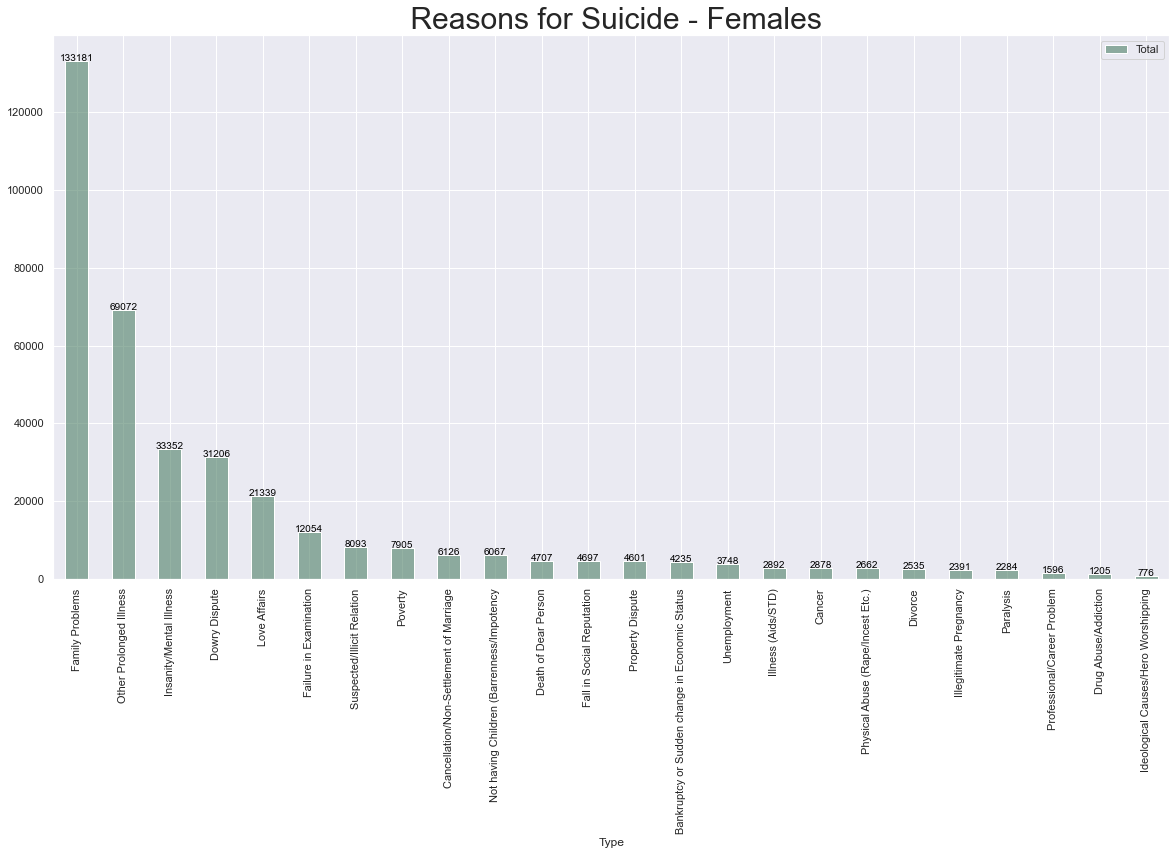

In [72]:
female_set = gender_set[gender_set['Gender'] == 'Female']
female_set = female_set.groupby('Type').sum().reset_index()
female_set = female_set.sort_values('Total', ascending = False)
female_set = female_set.reset_index(drop=True)
plt.figure(figsize = (20,10))
g = female_set.plot(kind = 'bar', x = 'Type', figsize = (20,10), color = (0.3,0.5,0.4,0.6))
plt.xticks(rotation = 90)
for index, row in female_set.iterrows():
    g.text(x = row.name, y = row.Total, s = str(row.Total),color='black', ha="center")
plt.title(" Reasons for Suicide - Females", fontsize = 30)
plt.show()

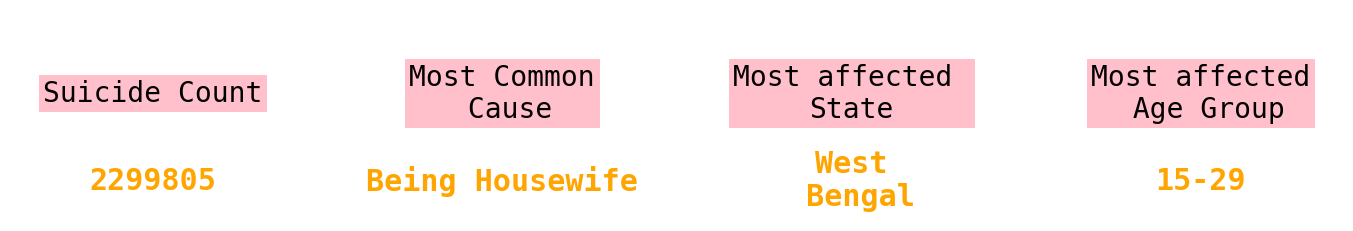

In [73]:
#Total Summary of Female Who Committed Suicides in India
col = ['Suicide Count', 'Most Common\n Cause', 'Most affected \nState', 'Most affected\n Age Group',]

values = [suicide_data.groupby('Gender').sum()['Total']['Female'],'Being Housewife','West\n Bengal','15-29']

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
axes = axes.flatten()
fig.set_facecolor('white')

for ind, col in enumerate(col):
    axes[ind].text(0.5, 0.6, col, 
            ha='center', va='center',
            fontfamily='monospace', fontsize=28,
            color='black', backgroundcolor='pink')

    axes[ind].text(0.5, 0.2, values[ind], 
            ha='center', va='center',
            fontfamily='monospace', fontsize=30, fontweight='bold',
            color='Orange', backgroundcolor='white')
    
    axes[ind].set_axis_off()

#### Total Summary of People Who Committed Suicides in India

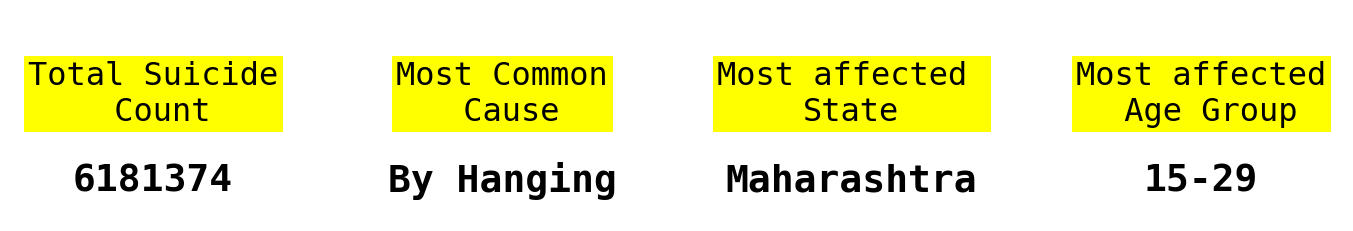

In [74]:
col = ['Total Suicide\n Count', 'Most Common\n Cause', 'Most affected \nState', 'Most affected\n Age Group',]

values = [suicide_data.groupby('Gender').sum()['Total']['Female'] + suicide_data.groupby('Gender').sum()['Total']['Male'],'By Hanging','Maharashtra','15-29']
color_val = ['lightblue','lightblue','lightblue','lightblue']

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
axes = axes.flatten()
fig.set_facecolor('white')

for ind, col in enumerate(col):
    axes[ind].text(0.5, 0.6, col, 
            ha='center', va='center',
            fontfamily='monospace', fontsize=32,
            color='black', backgroundcolor='yellow')

    axes[ind].text(0.5, 0.2, values[ind], 
            ha='center', va='center',
            fontfamily='monospace', fontsize=38, fontweight='bold',
            color='black', backgroundcolor='white')
    
    axes[ind].set_axis_off()

### Bivariate Analysis

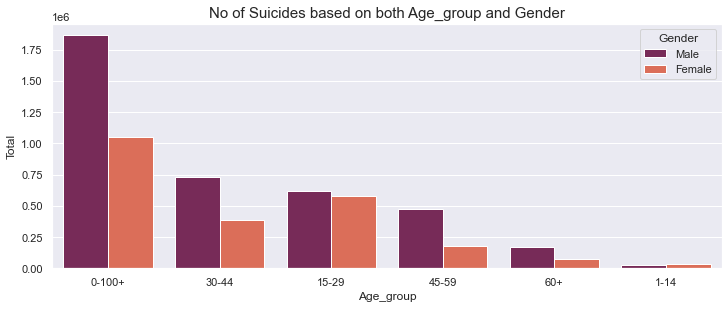

In [75]:
plt.figure(figsize=(12,4.5))
suicide_data1 = suicide_data[['Age_group','Gender','Total']]
data_age = suicide_data1.groupby(['Age_group','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
g = sns.barplot(x='Age_group',y='Total',hue='Gender',data=data_age,palette='rocket')
x = g.set_title('No of Suicides based on both Age_group and Gender', fontsize = 15)

#### No of Suicides based on both Age_group and Gender for highest 3 states

In [76]:
State1 = suicide_data[suicide_data['State']=='Maharashtra']
State2 = suicide_data[suicide_data['State']=='West Bengal']
State3 = suicide_data[suicide_data['State']=='Andhra Pradesh']

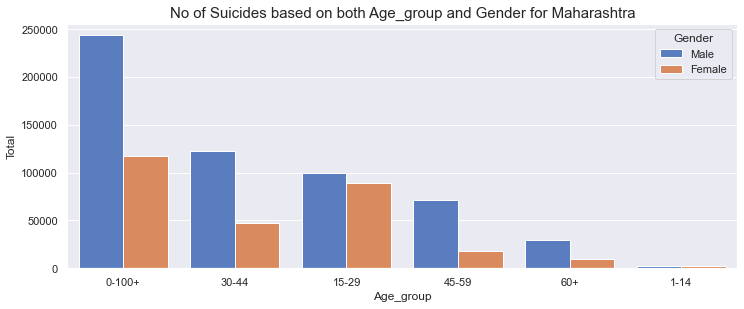

In [77]:
plt.figure(figsize=(12,4.5))
State1 = State1[['Age_group','Gender','Total']]
data_age = State1.groupby(['Age_group','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
g = sns.barplot(x='Age_group',y='Total',hue='Gender',data=data_age,palette='muted')
x = g.set_title('No of Suicides based on both Age_group and Gender for Maharashtra', fontsize = 15)

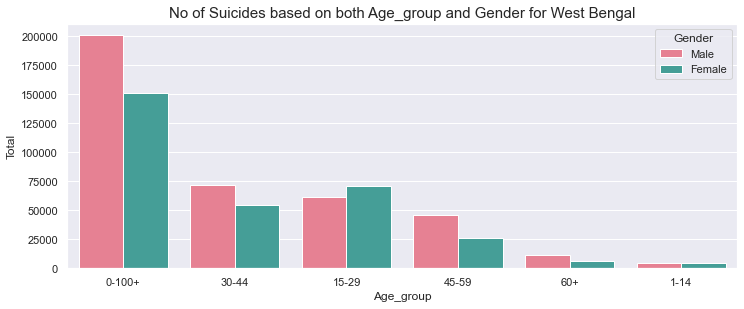

In [78]:
plt.figure(figsize=(12,4.5))
State2 = State2[['Age_group','Gender','Total']]
data_age = State2.groupby(['Age_group','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
g = sns.barplot(x='Age_group',y='Total',hue='Gender',data=data_age,palette='husl')
x = g.set_title('No of Suicides based on both Age_group and Gender for West Bengal', fontsize = 15)

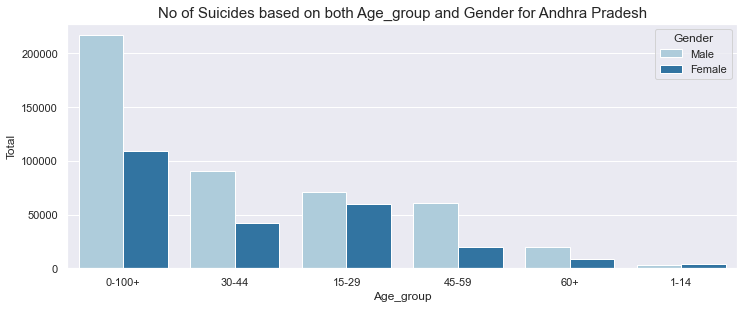

In [79]:
plt.figure(figsize=(12,4.5))
State3 = State3[['Age_group','Gender','Total']]
data_age = State3.groupby(['Age_group','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
g = sns.barplot(x='Age_group',y='Total',hue='Gender',data=data_age,palette='Paired')
x = g.set_title('No of Suicides based on both Age_group and Gender for Andhra Pradesh', fontsize = 15)

#### Reason Analysis based on gender

In [80]:
total_set = pd.concat([female_set, male_set], axis = 1)
total_set.columns = ['Type', 'Female', 't', 'Male']
total_set = total_set.drop(columns = ['t'])
female_more = total_set[total_set['Female'] > total_set['Male']]
female_more

,Type,Female,Male
3,Dowry Dispute,31206,31175
18,Divorce,2535,2521
19,Illegitimate Pregnancy,2391,1598
20,Paralysis,2284,1342
21,Professional/Career Problem,1596,1330
22,Drug Abuse/Addiction,1205,764
23,Ideological Causes/Hero Worshipping,776,103


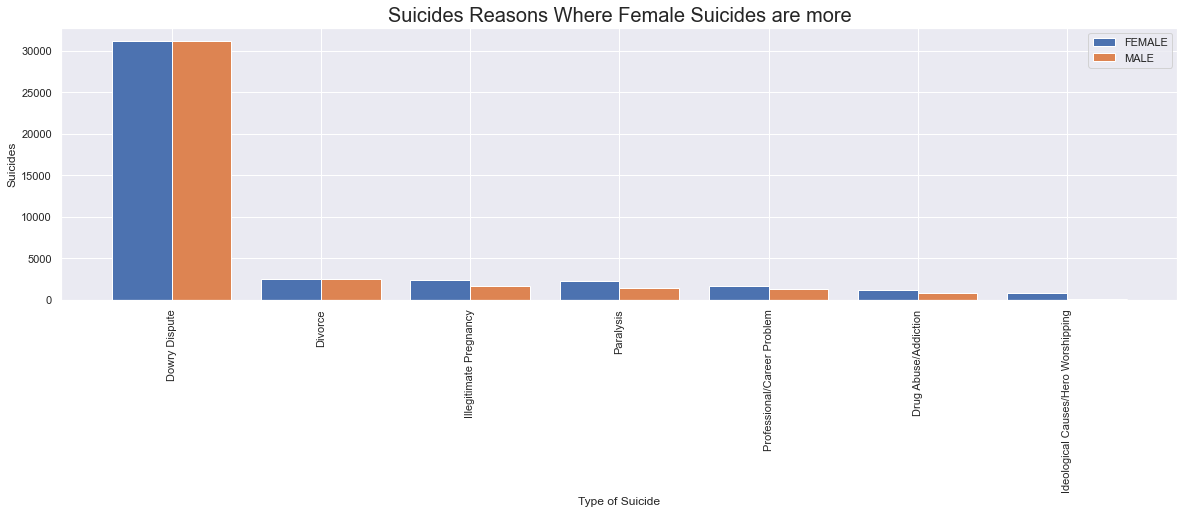

In [81]:
fig = plt.figure(figsize=(20,5))
N= len(female_more)
ind = np.arange(N); width = 0.4 
category = list(female_more['Type'])
plt.bar(x = ind, height = 'Female', data = female_more, width = width, label = 'FEMALE')
plt.bar(x = ind+width, height = 'Male', data = female_more, width = width, label = 'MALE')
plt.xlabel("Type of Suicide") 
plt.ylabel("Suicides")
plt.title("Suicides Reasons Where Female Suicides are more", fontsize = 20)
plt.xticks(ind + width / 2, category,rotation='vertical')
plt.legend(loc='best')
plt.show()

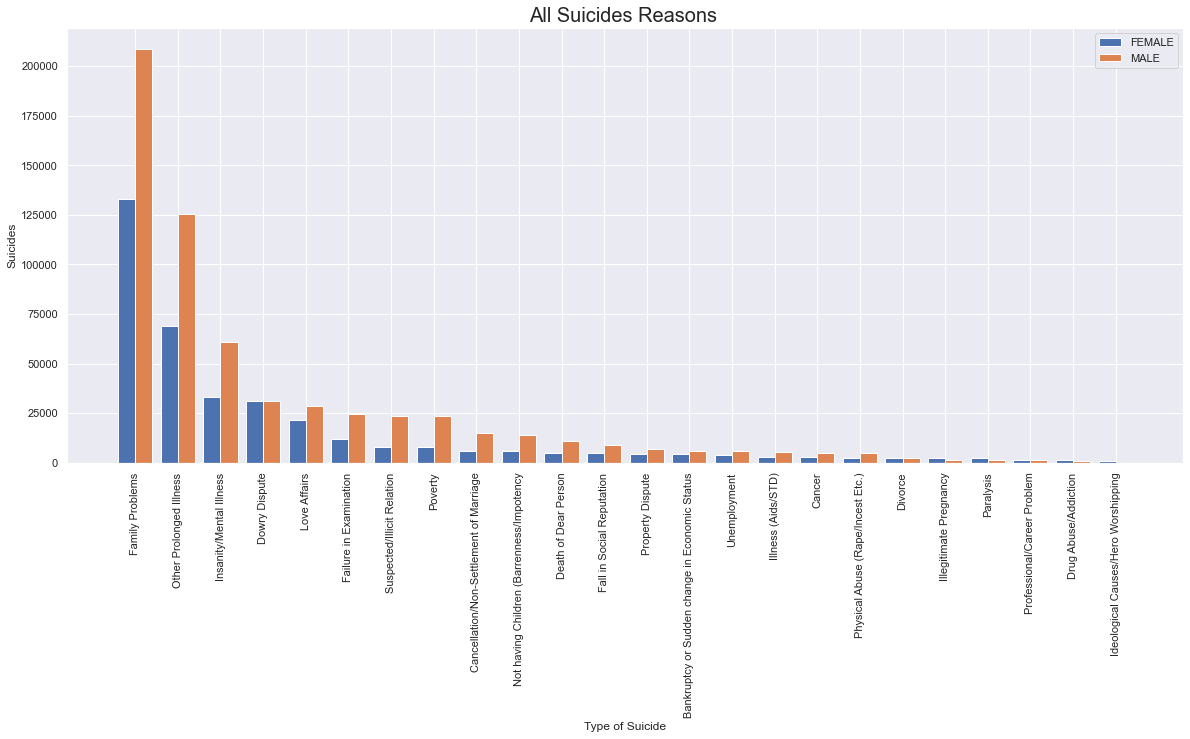

In [82]:
fig = plt.figure(figsize=(20,8))
N= len(total_set)
ind = np.arange(N); width = 0.4 
category = list(total_set['Type'])
plt.bar(x = ind, height = 'Female', data = total_set, width = width, label = 'FEMALE')
plt.bar(x = ind+width, height = 'Male', data = total_set, width = width, label = 'MALE')
plt.xlabel("Type of Suicide") 
plt.ylabel("Suicides")
plt.title("All Suicides Reasons ", fontsize = 20)
plt.xticks(ind + width / 2, category,rotation='vertical')
plt.legend(loc='best')
plt.show()

Men seem to be more vulnerable to commit suicide.

"Family problems" is the major reason for all the suicides irrespective of the gender

Dowry Dispute is second highest reason for women to commit suicide.

Dowry Dispute , Infertility , Physical abuse are the reasons where Women suicide rate is more than men.

Love affairs is the reason where suicide rate is alomost same in Men and Women.


# Outlier Analysis

In [83]:
Total_column = suicide_data.loc[:,'Total']
Total = Total_column.values
Total

array([   1,    1,    1, ..., 5451,  189, 2658], dtype=int64)

In [84]:
len(Total)

86576

### Using Z score

In [85]:
outliers=[]
def detect_outlier(Total_1):
    
    threshold=3
    mean_1 = np.mean(Total_1)
    std_1 =np.std(Total_1)
    
    
    for y in Total_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [86]:
outlier_datapoints = detect_outlier(Total)
len(outlier_datapoints)

1202

### Using IQR

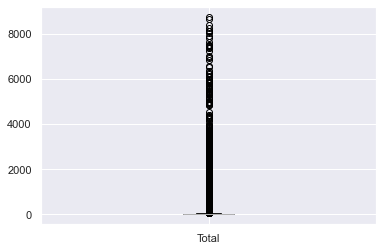

In [87]:
suicide_data.boxplot(column=['Total'])
x = plt.show

In [88]:
sorted(Total)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [89]:
q1, q3= np.percentile(Total,[25,75])
print(q1,q3)

2.0 32.0


In [90]:
iqr = q3-q1
iqr

30.0

In [91]:
lower_bound = q1 - (1.5 * iqr)
lower_bound

-43.0

In [92]:
upper_bound = q3 + (1.5 * iqr)
upper_bound

77.0

In [93]:
suicide_data['Total'] = np.where(suicide_data['Total']>upper_bound,upper_bound,suicide_data['Total'])
suicide_data['Total'] = np.where(suicide_data['Total']<lower_bound,lower_bound,suicide_data['Total'])

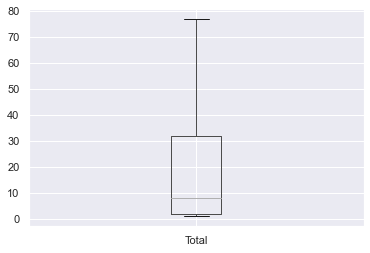

In [94]:
suicide_data.boxplot(column=['Total'])
x = plt.show

# Feature Selection

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

In [96]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [97]:
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.fit_transform(y_test)
    return y_train_enc, y_test_enc

### Chi squared Feature Selection for Categorical Data

In [98]:
# load the dataset
# retrieve numpy array
dataset = stat_data.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

# format all fields as string
X = X.astype(str)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 11270.179322
Feature 1: 3324.009074
Feature 2: 3751.431583
Feature 3: 13471.289825
Feature 4: 824.475845
Feature 5: 3439.292150


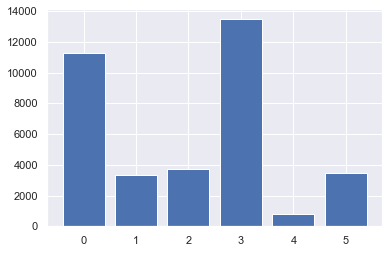

In [99]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables. The results of this test can be used for feature selection, where those features that are independent of the target variable can be removed from the dataset.

We define the SelectKBest class to use the chi2() function and select all features, then transform the train and test sets.

We then printed the scores calculated for each input feature and the target variable and plotted the scores for each variable as a bar graph to get an idea of how many features we should select.

Perhaps features 0, 2, 3, and 5 are most relevant.

### Mutual Information Feature Selection

In [100]:
# load the dataset
# retrieve numpy array
dataset = stat_data.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

# format all fields as string
X = X.astype(str)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.079221
Feature 1: 0.003689
Feature 2: 0.044469
Feature 3: 0.098086
Feature 4: 0.095787
Feature 5: 0.047748


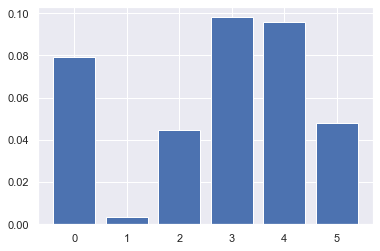

In [101]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection. Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable. Like chi2(), it can be used in the SelectKBest feature selection strategy (and other strategies).

Running the program first prints the scores calculated for each input feature and the target variable. In this case, we can see that some of the features have a very low score, suggesting that perhaps they can be removed.

A bar chart of the feature importance scores for each input feature is created.

Perhaps features 3, 0, 5, and 2 are most relevant.

Importantly, a different mixture of features is promoted.

# Dependencies and Prediction

### Count of suicides per year in each age group for each gender

In [102]:
total_suicide_per_Year_genderwise = suicide_data[['Year','Gender','Age_group','Total']]
total_suicide_per_Year_genderwise_sorted = total_suicide_per_Year_genderwise.groupby(['Year','Gender','Age_group'],as_index=False).sum().sort_values('Total',ascending=True)

In [103]:
fig = px.scatter(total_suicide_per_Year_genderwise_sorted,
                     x="Year", y="Age_group", size="Total", color="Gender",
                     size_max=60,
                     template='seaborn', title="Suicide count")
fig.show()

The above visualization will help us see the count of suicides for each year in each of the age_group by toggling between the different bubbles. It is observed that the suicide count was higher in both the genders in the year 2011 in the age range of 30–44 in men and the range of 15–29 in female.

### Count of suicides per state in each age group for each gender

In [104]:
total_suicide_statetotal = suicide_data[['State','Gender','Age_group','Total']]
total_suicide_statetotal_sorted = total_suicide_statetotal.groupby(['State','Gender','Age_group'],as_index=False).sum().sort_values('Total',ascending=True)

In [105]:
fig = px.scatter(total_suicide_statetotal_sorted,
                     x="State", y="Gender", size="Total", color="Age_group",
                     size_max=60,
                     template='seaborn', title="Suicide count")

fig.show()

In the below visualization, we can clearly see that the size of the bubble gives the count of suicides. The bubble with the biggest size indicates the highest count. We can capture every minute detail about each of the states. And it is easier to distinguish the suicide counts for each gender in each of the states in each age group by the size of the bubble which increases or decreases accordingly as we toggle between the different age groups on the right side menu.

Age group of 15–29 is the most vulnerable age in all the states except Kerala.

### Suicide counts in each state per Gender.

In [106]:
total_suicide_per_state_genderwise = suicide_data[['State','Gender','Total']]
total_suicide_per_state_genderwise_sort = total_suicide_per_state_genderwise.groupby(['State','Gender'],as_index=False).sum().sort_values('Total',ascending=False)

In [107]:
px.scatter(total_suicide_per_state_genderwise_sort, x = 'State', y = 'Total', color = 'Gender',size = 'Total',size_max = 60,template='plotly_dark')

It is clearly visible from the below visualization that Maharashtra had the highest count of suicides in the male category whereas West Bengal had the highest count of suicides in the female category.

### Age group wise suicide count in each state

In [108]:
total_suicide_per_age_group_statewise = suicide_data[['State','Age_group','Total']]
total_suicide_per_age_group_statewise_sorted = total_suicide_per_age_group_statewise.groupby(['Age_group','State'],as_index=False).sum().sort_values('Total',ascending=False)

In [109]:
fig = px.scatter(total_suicide_per_age_group_statewise_sorted, x = 'State',y = 'Total', color = 'Age_group',size = 'Total',size_max =60,template='plotly_dark')
fig.show()

Maharashtra had the highest count of suicide in the age group of 15-29 and 30-44.

People in the age group of 45-59 aacounted for the highest suicide counts in Tamil Nadu.

Kerala had the highest count of suicide in the age group of 60+.

West Bengal had the highest count of suicide in the age group of 0-14.

### Suicide count according to profession per state genderwise

In [110]:
profession = suicide_data.loc[suicide_data['Type_code']=='Professional_Profile']
print(profession.shape)
profession.sample(10)

(17782, 7)


,State,Year,Type_code,Type,Gender,Age_group,Total
219979,Uttar Pradesh,2005,Professional_Profile,Self-employed (Business activity),Male,45-59,42.0
160386,Mizoram,2009,Professional_Profile,Unemployed,Male,15-29,1.0
66258,Delhi,2010,Professional_Profile,Unemployed,Female,15-29,32.0
226682,Uttarakhand,2005,Professional_Profile,Student,Female,1-14,3.0
190223,Rajasthan,2002,Professional_Profile,Self-employed (Business activity),Male,30-44,43.0
175537,Odisha,2012,Professional_Profile,Student,Male,1-14,28.0
221091,Uttar Pradesh,2007,Professional_Profile,Public Sector Undertaking,Male,30-44,11.0
215483,Tripura,2009,Professional_Profile,Service (Private),Male,60+,3.0
154205,Meghalaya,2010,Professional_Profile,Service (Private),Male,15-29,6.0
60052,Daman & Diu,2011,Professional_Profile,House Wife,Female,15-29,5.0


In [111]:
gender_state_means_genderwise_prof = profession[['Type','Type_code','Gender','State','Total']]
gender_state_means_genderwise_prof_sort = gender_state_means_genderwise_prof.groupby(['Type','Gender','State'],as_index=False).sum().sort_values('Total',ascending=False)
fig = px.scatter(gender_state_means_genderwise_prof_sort,
                     x="Type", y="Gender", size="Total", color="State",
                     size_max=60,
                     template='plotly_dark', title="Suicide count")
fig.update_layout(title = 'Suicide count according to profession per state genderwise'
                     ,xaxis_title = 'Profession type'
                    ,yaxis_title = 'Number of Suicides'
                    ,font = dict(size = 10))

fig.show()

# in Maharashtra reason is farming for male and housewife for female.

As we observed in the above visualization, irrespective of state and age group, most of the females who have committed suicides are house wives. Could it be early marriage, dowry dispute, domestic violence ? Also could financial dependence be one of the reasons ? Because in the other categories, the count of female suicide is comparatively lower and this definitely pinpoints the fact that girl education and women empowerment is very much necessary.

On the other hand, it is really sad to see highest count of farmers committing suicides compared to other professions followed by unemployed, private sector and self employed. Whereas public sector , government service have very less count of suicides. One of the reasons for high number of suicides in the farming, unemployed and private sector could be stress leading to depression.

## Modeling with Selected Features

Logistic Regression model with all features compared to a model built from features selected by chi-squared and those features selected via mutual information can be carried out. Logistic regression is a good model for testing feature selection methods as it can perform better if irrelevant features are removed from the model.

### Model Built Using All Features

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

As a first step, we evaluate a LogisticRegression model using all the available features.

The model is fit on the training dataset and evaluated on the test dataset.

In [129]:
# load the dataset
# retrieve numpy array
dataset = stat_data.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

# format all fields as string
X = X.astype(str)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_enc)

# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 61.30


The model prints the accuracy of the model on our dataset. In this case, we can see that the model achieves a classification accuracy of about 61%.

We would prefer to use a subset of features that achieves a classification accuracy that is as good or better than this.

### Model Built Using Chi-Squared Features

We use the chi-squared test to score the features and select the four most relevant features.

In [130]:
# load the dataset
# retrieve numpy array
dataset = stat_data.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

# format all fields as string
X = X.astype(str)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
fs = SelectKBest(score_func=mutual_info_classif, k=4)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 82.24


The performance of the model on just four of the six input features selected using the chi-squared statistic isidentified.In this case, we see that the model achieved an accuracy of about 82%, an increase in performance.

It is possible that some of the features removed are, in fact, adding value directly or in concert with the selected features.

At this stage, we would probably prefer to use input features of chi square test.

### Model Built Using Mutual Information Features

We repeat the experiment and select the top four features using a mutual information statistic.

In [131]:
# load the dataset
# retrieve numpy array
dataset = stat_data.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

# format all fields as string
X = X.astype(str)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
fs = SelectKBest(score_func=mutual_info_classif, k=4)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 82.24


Running the example fits the model on the four top selected features chosen using mutual information.

In this case, we can see a similar classification accuracy. We can either use Model Built Using Mutual Information Features or Model Built Using Chi-Squared Features because both of their similar accuracy rates

### Prediction

#### Bihar Prediction Model

In [116]:
#Copy of the suicide dataset where state is bihar (For prediction purpose)
bihar_df = suicide_data[suicide_data['State'] == 'Bihar'].copy()
bihar_df = bihar_df.groupby(['Year']).sum()
bihar_df.reset_index(inplace=True)

In [117]:
#Building the model to predict the actual total number of cases in bihar
X = bihar_df[['Year']] 
y = bihar_df['Total']

#Splitting the dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.3,random_state=10)

lin=LinearRegression()
lin.fit(X_train,Y_train)
ypred=lin.predict(X_test)

df = pd.DataFrame({'Actual Value': Y_test, 'Predicted Value': ypred})
df

,Actual Value,Predicted Value
2,2060.0,2038.558824
6,2997.0,2280.496078
7,2556.0,2340.980392
5,2195.0,2220.011765


In [118]:
#Building the model to predict the total number of cases in bihar
X = bihar_df[['Year']]
y = bihar_df['Total']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.25,random_state=10)

model = LinearRegression()
model.fit(X, y)

data = [[2001]]
X_predict = pd.DataFrame(data, columns = ['Year']) 

y_predict = model.predict(X_predict)

df = pd.DataFrame({'Predicted Value': y_predict})
df

,Predicted Value
0,1971.141026


In the similar way we can make prediction models for all the states and union territories for our further analysis

In [119]:
# grabs first 2 chars from Age Column
suicide_data['AgeN'] = suicide_data['Age_group'].str[:2]

# remove all instances of dash -
suicide_data['AgeN'] = suicide_data['AgeN'].map(lambda x: x.replace('-',''))

# now, convert it to type int (not Object)
suicide_data['AgeN'] = suicide_data['AgeN'].astype(int)

suicide_data['AgeN'].tail(3)

237516    0
237517    0
237518    0
Name: AgeN, dtype: int32

In [120]:
suicide_data['AgeN'].head(3)

13    1
32    1
47    1
Name: AgeN, dtype: int32

In [121]:
newData= suicide_data.loc[:,['Year','Gender','AgeN','Total']]
X = newData.iloc[:, :-1].values # grab the every col except last
y = newData.iloc[:, -1].values # grab last col

In [122]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [124]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [125]:
# Males, 60 years of age, in the year 2020
print(regressor.predict([[1,2020,0,60]]))

[4356.1186222]


In [126]:
#Females, 40 years of age in the year 2025
print(regressor.predict([[1,2025,1,40]]))

[4371.09772306]


In [127]:
# Males, 40 years of age in the year 2030
print(regressor.predict([[1,2030,0,40]]))

[4382.12476421]
